<a href="https://colab.research.google.com/github/vamsisai03/Youtube-Network-Analysis/blob/main/Youtube%20Network%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [ ]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# If you want interactive plots, uncomment the next line
# %matplotlib notebook

In [ ]:
data_CA = pd.read_csv('/content/drive/MyDrive/SIN Project/CAvideos.csv')
data_DE = pd.read_csv('/content/drive/MyDrive/SIN Project/DEvideos.csv')
data_FR = pd.read_csv('/content/drive/MyDrive/SIN Project/FRvideos.csv')
data_GB = pd.read_csv('/content/drive/MyDrive/SIN Project/GBvideos.csv')

# **Reading the dataset**



Then we read the dataset file which is in csv format

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SIN Project/USvideos.csv")

We set some configuration options just for improving visualization graphs

In [ ]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

# **Getting a feel of the dataset**

Let's get a feel of our dataset by displaying its first few rows

In [ ]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


Now, let's see some information about our dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

We can see that there are 40,949 entries in the dataset. We can see also that all columns in the dataset are complete (i.e. they have 40,949 non-null entries) except description column which has some null values; it only has 40,379 non-null values.

# **Data cleaning**

The description column has some null values. These are some of the rows whose description values are null. We can see that null values are denoted by NaN

In [ ]:
df[df["description"].apply(lambda x: pd.isna(x))].head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN


So to do some sort of data cleaning, and to get rid of those null values, we put an empty string in place of each null value in the description column

In [ ]:
df["description"] = df["description"].fillna(value="")

# **Dataset collection years**

Let's see in which years the dataset was collected

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


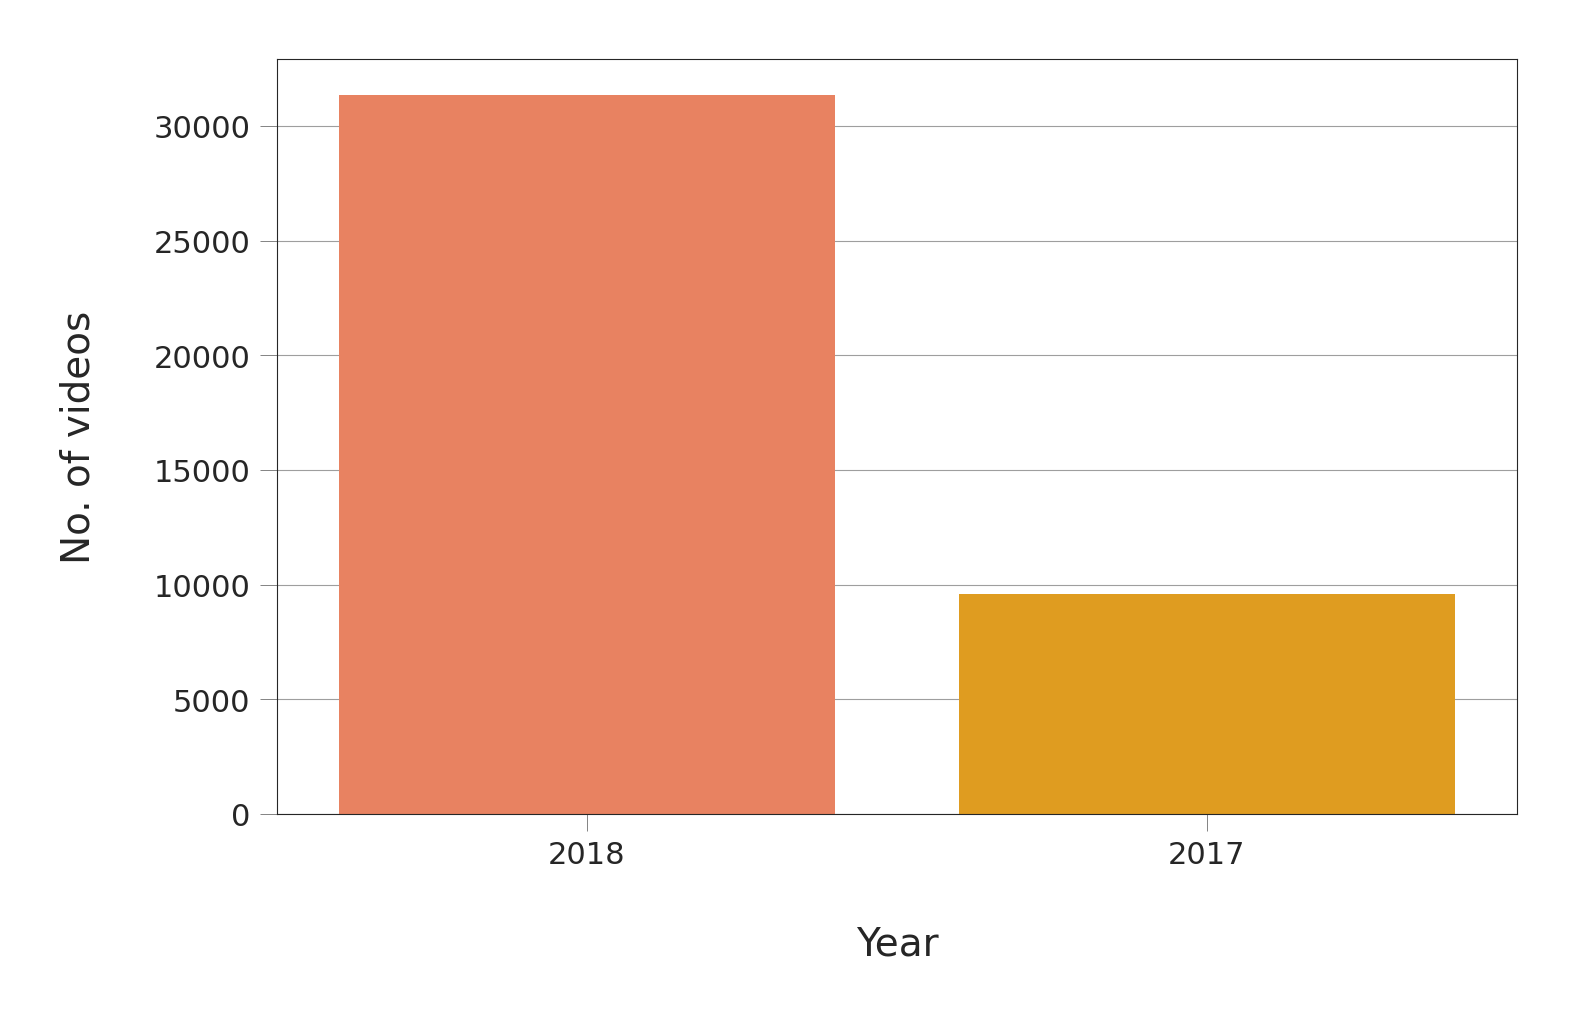

In [ ]:
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

In [ ]:
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2018   0.77
2017   0.23
Name: trending_date, dtype: float64

We can see that the dataset was collected in 2017 and 2018 with 77% of it in 2018 and 23% in 2017.

# **Describtion of numerical columns**
Now, let's see some statistical information about the numerical columns of our dataset

In [ ]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80
std,7.57,7394113.76,228885.34,29029.71,37430.49
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00
50%,24.00,681861.00,18091.00,631.00,1856.00
75%,25.00,1823157.00,55417.00,1938.00,5755.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


We note from the table above that

The average number of views of a trending video is 2,360,784. The median value for the number of views is 681,861, which means that half the trending videos have views that are less than that number, and the other half have views larger than that number
The average number of likes of a trending video is 74,266, while the average number of dislikes is 3,711. The
Average comment count is 8,446 while the median is 1,856
How useful are the observations above? Do they really represent the data? Let's examine more.

# **Views histogram**
let's plot a histogram for the views column to take a look at its distribution: to see how many videos have between 10 million and 20 million views, how many videos have between 20 million and 30 million views, and so on.

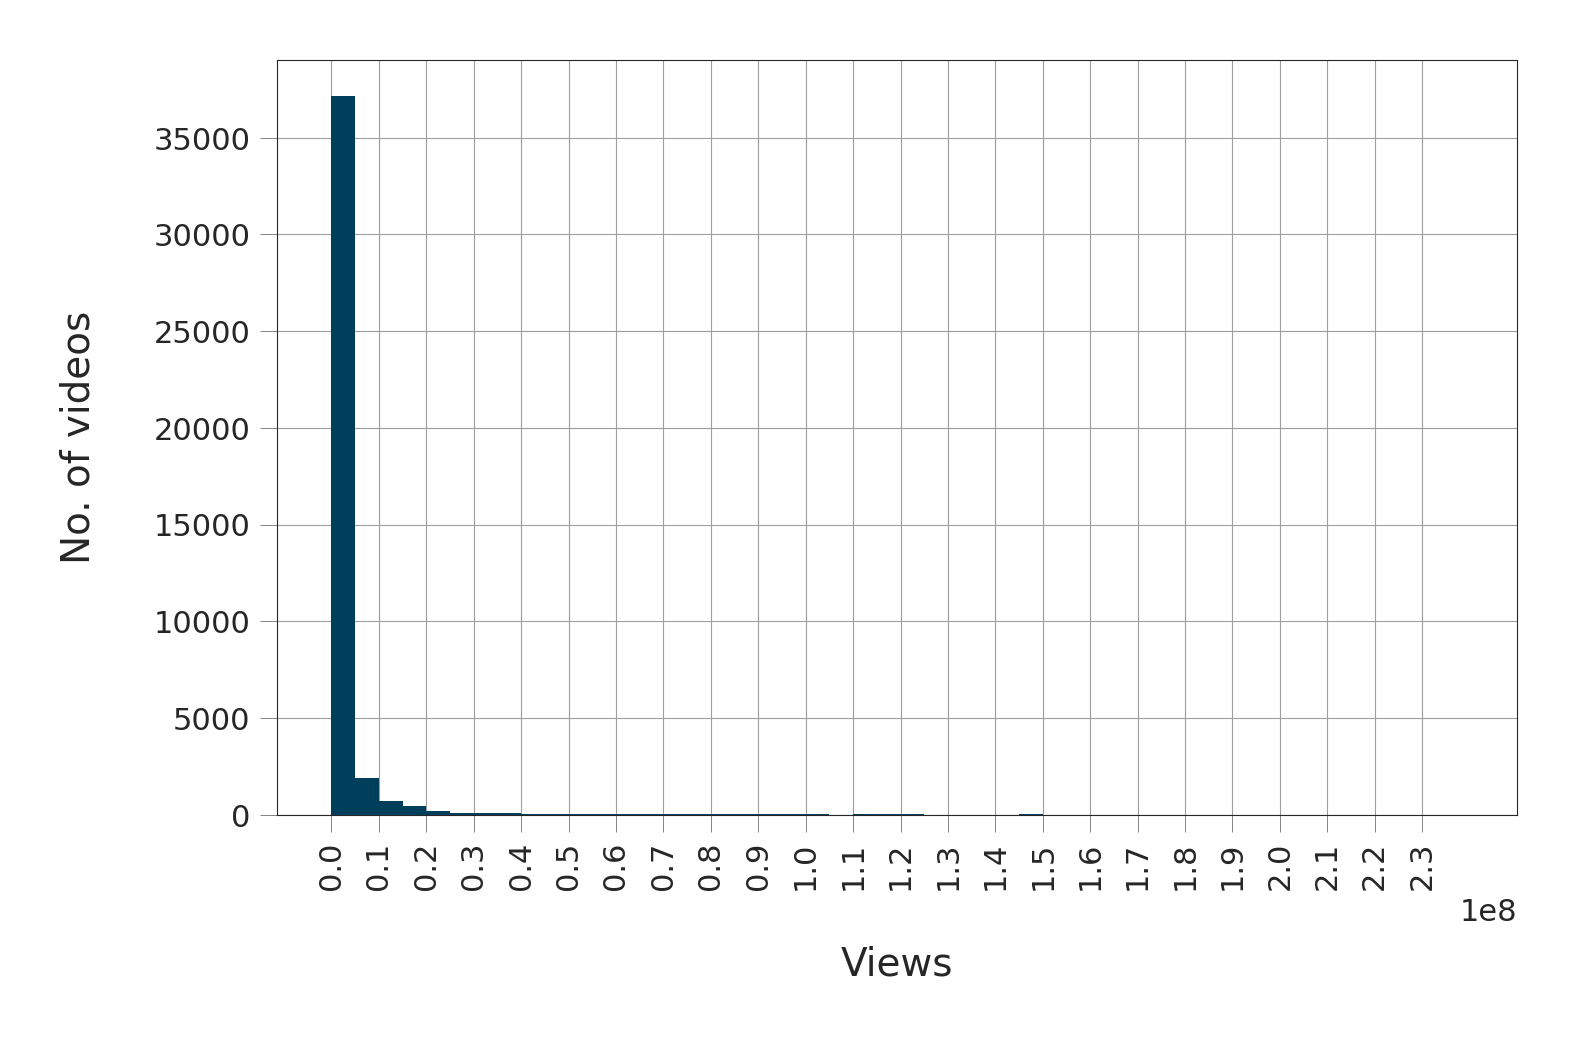

In [ ]:
fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, color=PLOT_COLORS[4], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

We note that the vast majority of trending videos have 5 million views or less. We get the 5 million number by calculating

0.1×1082=5×106
 
Now let us plot the histogram just for videos with 25 million views or less to get a closer look at the distribution of the data

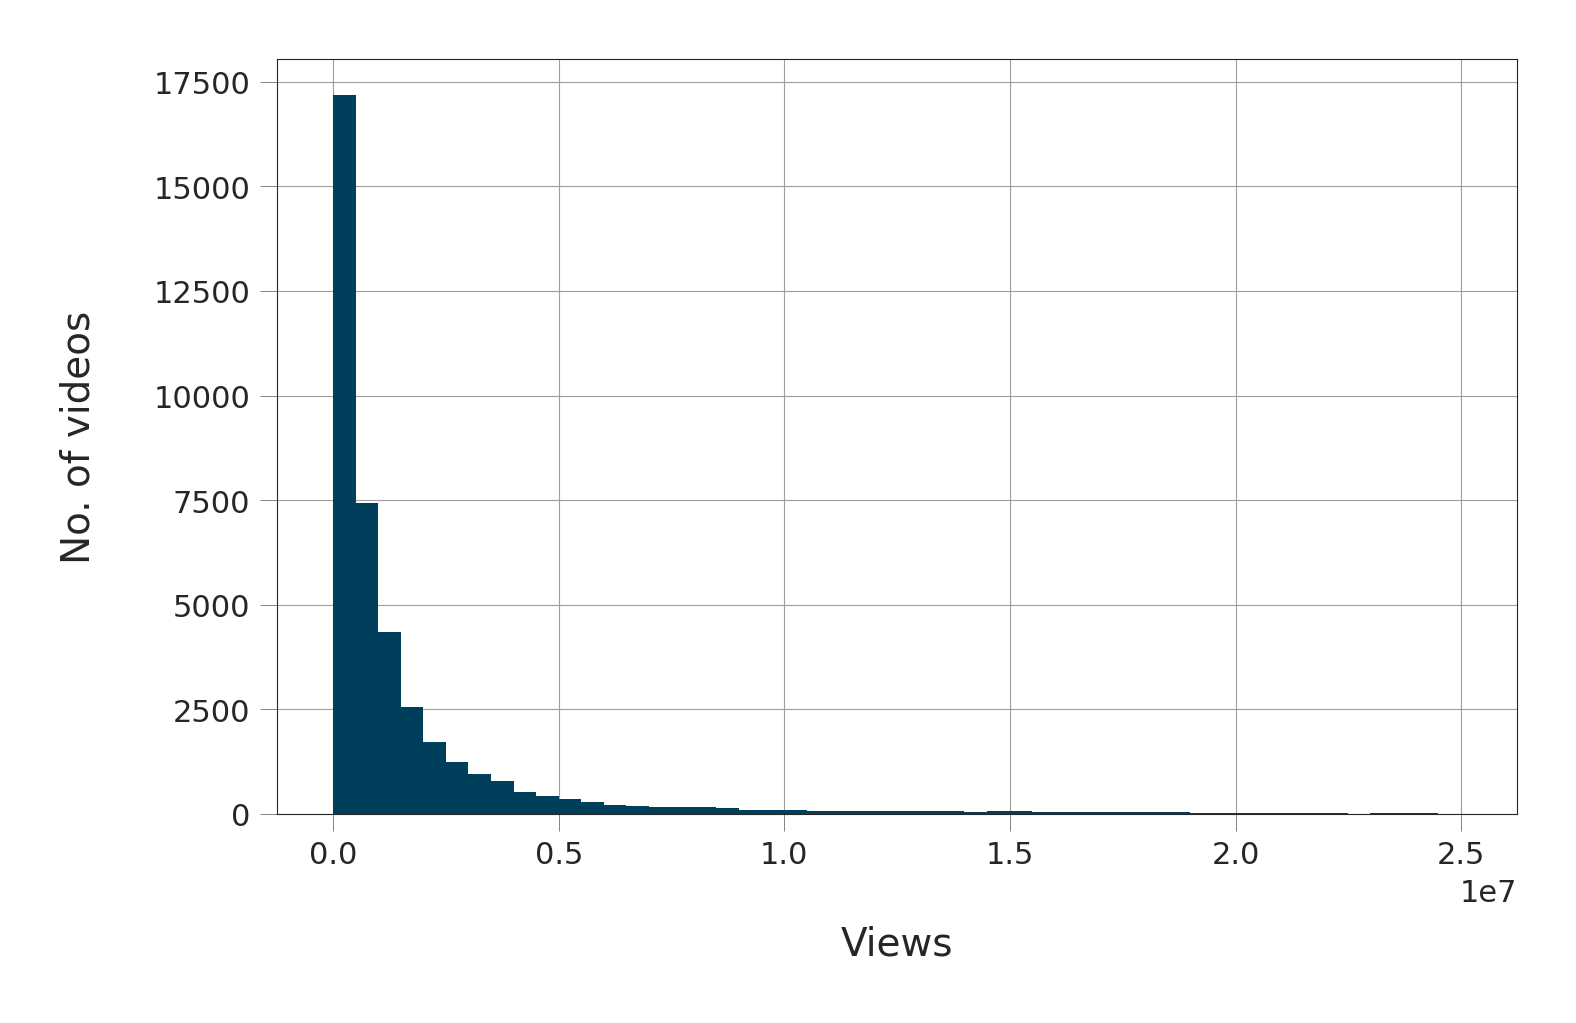

In [ ]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["views"] < 25e6]["views"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

Now we see that the majority of trending videos have 1 million views or less. Let's see the exact percentage of videos less than 1 million views

In [ ]:
df[df['views'] < 1e6]['views'].count() / df['views'].count() * 100

60.09426359618062

So, it is around 60%. Similarly, we can see that the percentage of videos with less than 1.5 million views is around 71%, and that the percentage of videos with less than 5 million views is around 91%.

# **Likes histogram**
After views, we plot the histogram for likes column

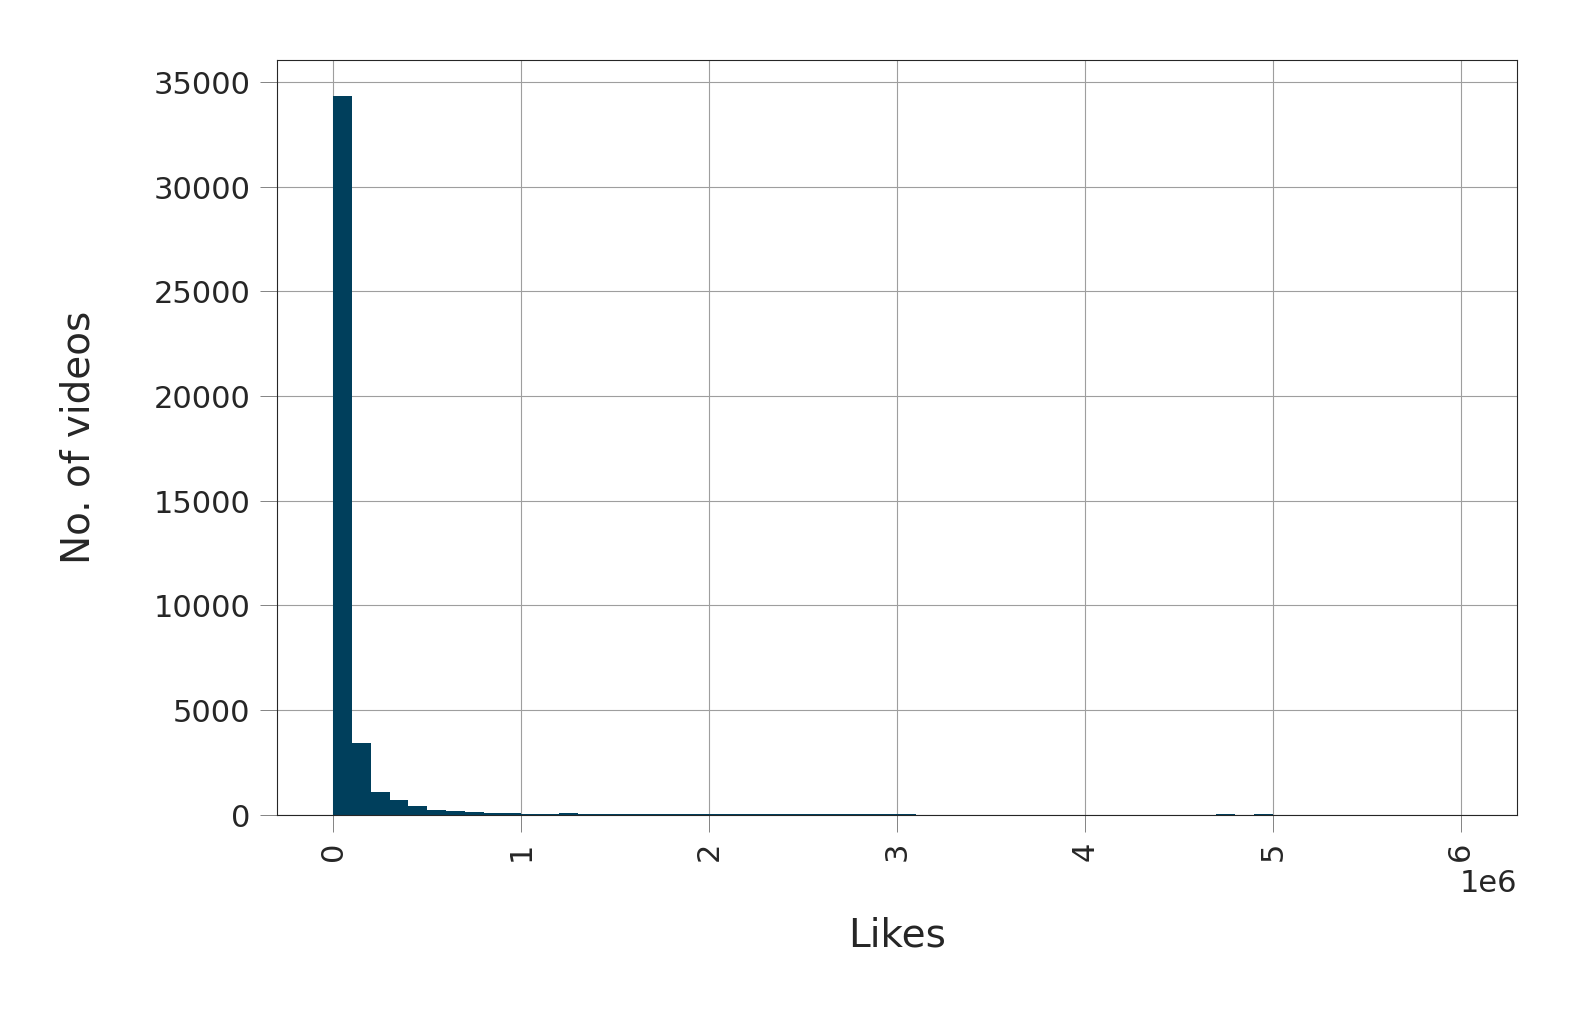

In [ ]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

We note that the vast majority of trending videos have between 0 and 100,000 likes. Let us plot the histogram just for videos with 1000,000 likes or less to get a closer look at the distribution of the data

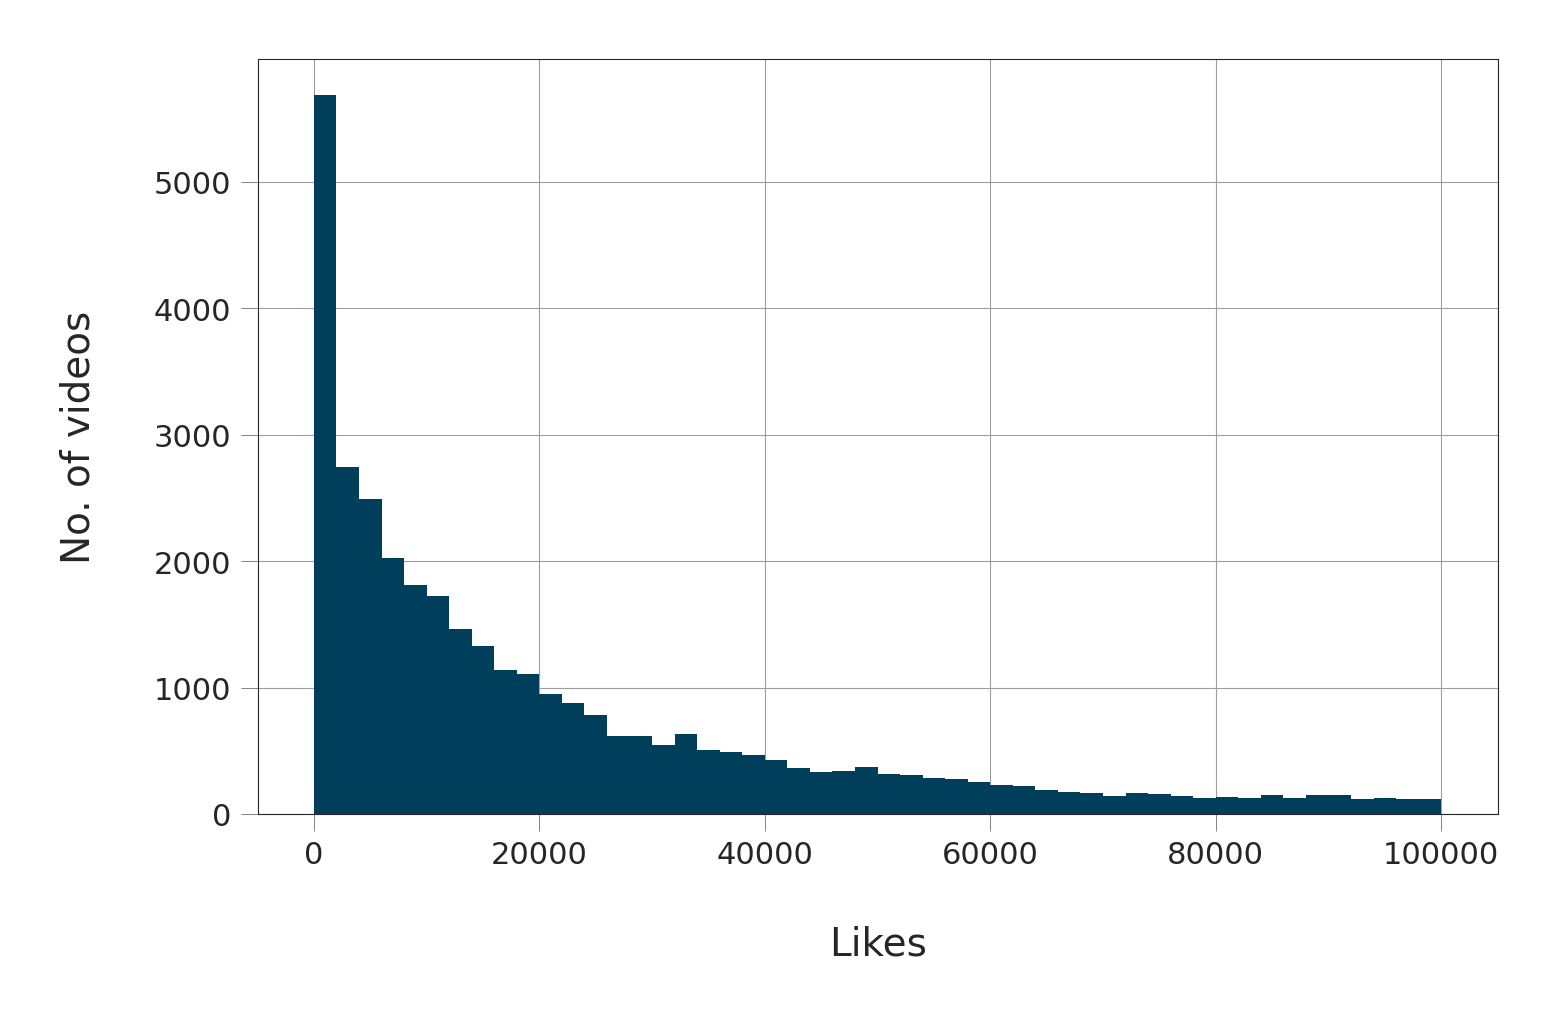

In [ ]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

Now we can see that the majority of trending videos have 40000 likes or less with a peak for videos with 2000 likes or less.

Let's see the exact percentage of videos with less than 40000 likes

In [ ]:
df[df['likes'] < 4e4]['likes'].count() / df['likes'].count() * 100

68.4900730176561

Similarly, we can see that the percentage of videos with less than 100,000 likes is around 84%

# **Comment count histogram**

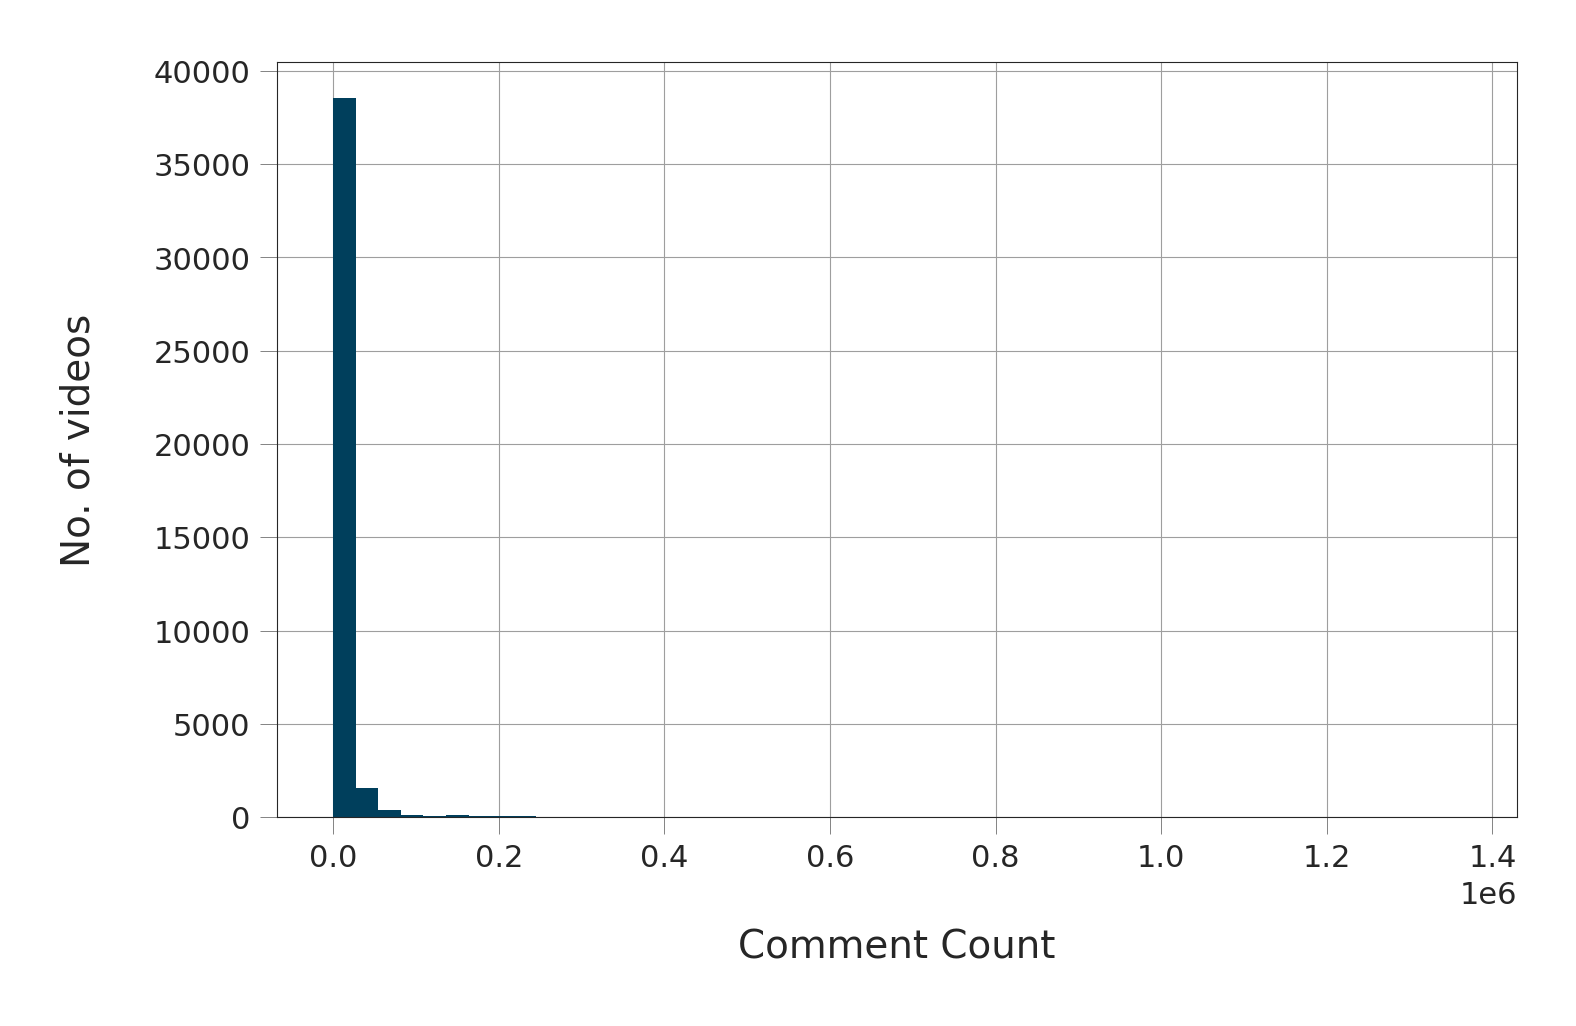

In [ ]:
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

Let's get a closer look by eliminating entries with comment count larger than 200000 comment

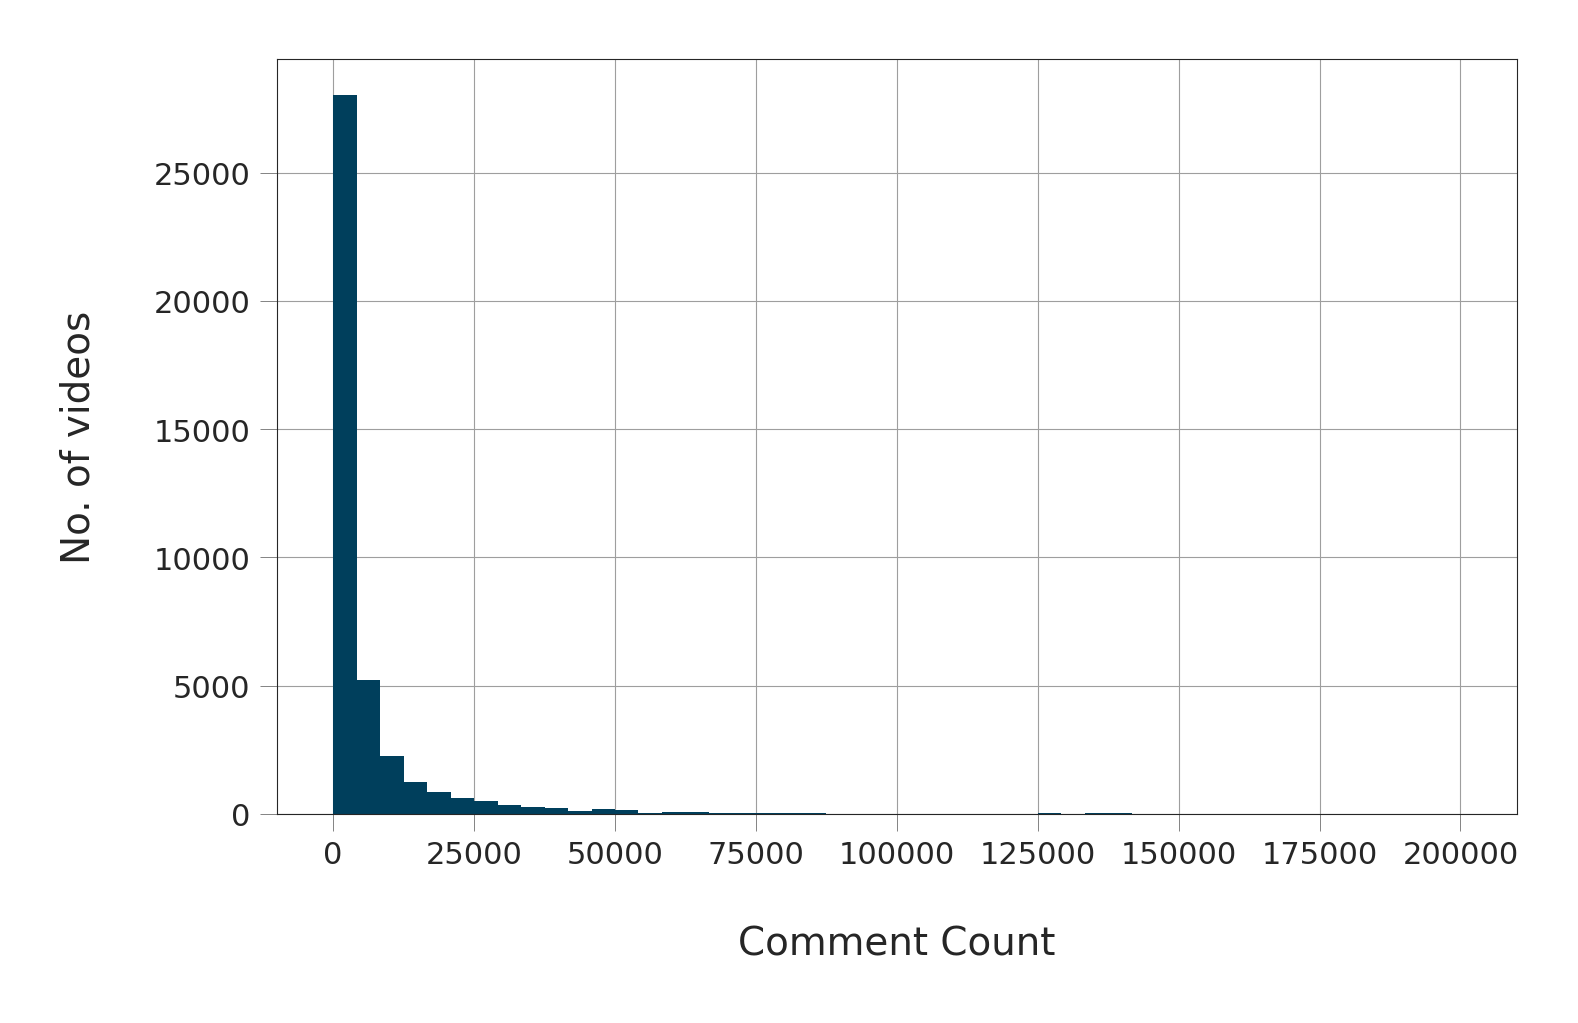

In [ ]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

We see that most trending videos have around

250006≈4166 comments
 
since each division in the graph has six histogram bins.

As with views and likes, let's see the exact percentage of videos with less than 4000 comments

In [ ]:
df[df['comment_count'] < 4000]['comment_count'].count() / df['comment_count'].count() * 100

67.48882756599673

In a similar way, we can see that the percentage of videos with less than 25,000 comments is around 93%.

# **Description on non-numerical columns**
After we described numerical columns previously, we now describe non-numerical columns

In [ ]:
df.describe(include = ['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40949
unique,6351,205,6455,2207,6269,6055,6352,6902
top,j4KvrAUjn6c,17.14.12,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,
freq,30,200,30,203,50,1535,30,570


From the table above, we can see that there are 205 unique dates, which means that our dataset contains collected data about trending videos over 205 days.

From video_id description, we can see that there are 40949 videos (which is expected because our dataset contains 40949 entries), but we can see also that there are only 6351 unique videos which means that some videos appeared on the trending videos list on more than one day. The table also tells us that the top frequent title is WE MADE OUR MOM CRY...HER DREAM CAME TRUE! and that it appeared 30 times on the trending videos list.

But there is something strange in the description table above: Because there are 6351 unique video IDs, we expect to have 6351 unique video titles also, because we assume that each ID is linked to a corresponding title. One possible interpretation is that a trending video had some title when it appeared on the trending list, then it appeared again on another day but with a modified title. Similar explaination applies for description column as well. For publish_time column, the unique values are less than 6351, but there is nothing strange here, because two different videos may be published at the same time.

To verify our interpretation for title column, let's take a look at an example where a trending video appeared more than once on the trending list but with different titles

In [ ]:
grouped = df.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)

wanted_groups[0]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
14266,0ufNmUyf2co,18.26.01,Here are the weirdest bikes I own - Freak Bike...,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",183149,6969,68,824,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...
14491,0ufNmUyf2co,18.27.01,Here are the weirdest bikes I own - Freak Bike...,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",203919,7358,72,746,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...
14706,0ufNmUyf2co,18.28.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",216447,7608,74,759,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...
14931,0ufNmUyf2co,18.29.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",227005,7754,78,759,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...
15175,0ufNmUyf2co,18.30.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",233482,7852,78,769,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...
15385,0ufNmUyf2co,18.31.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",238483,7894,81,778,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...


We can see that this video appeared on the list with two different titles.

# **How many trending video titles contain capitalized word?**
Now we want to see how many trending video titles contain at least a capitalized word (e.g. HOW). To do that, we will add a new variable (column) to the dataset whose value is True if the video title has at least a capitalized word in it, and False otherwise

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


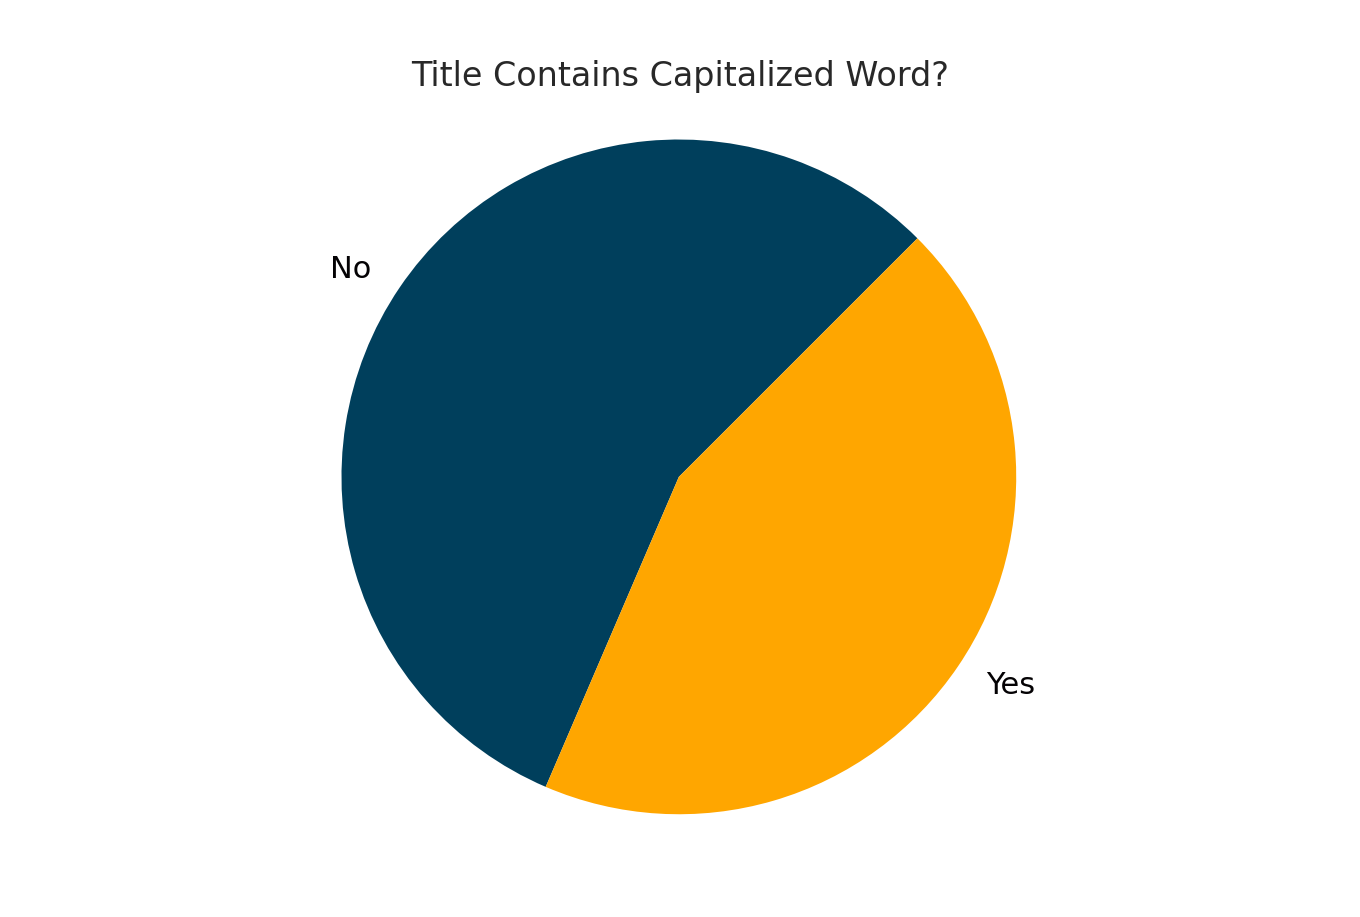

In [ ]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [ ]:
df["contains_capitalized"].value_counts(normalize=True)

False   0.56
True    0.44
Name: contains_capitalized, dtype: float64

We can see that 44% of trending video titles contain at least a capitalized word. We will later use this added new column contains_capitalized in analyzing correlation between variables.

# **Video title lengths**
Let's add another column to our dataset to represent the length of each video title, then plot the histogram of title length to get an idea about the lengths of trnding video titles

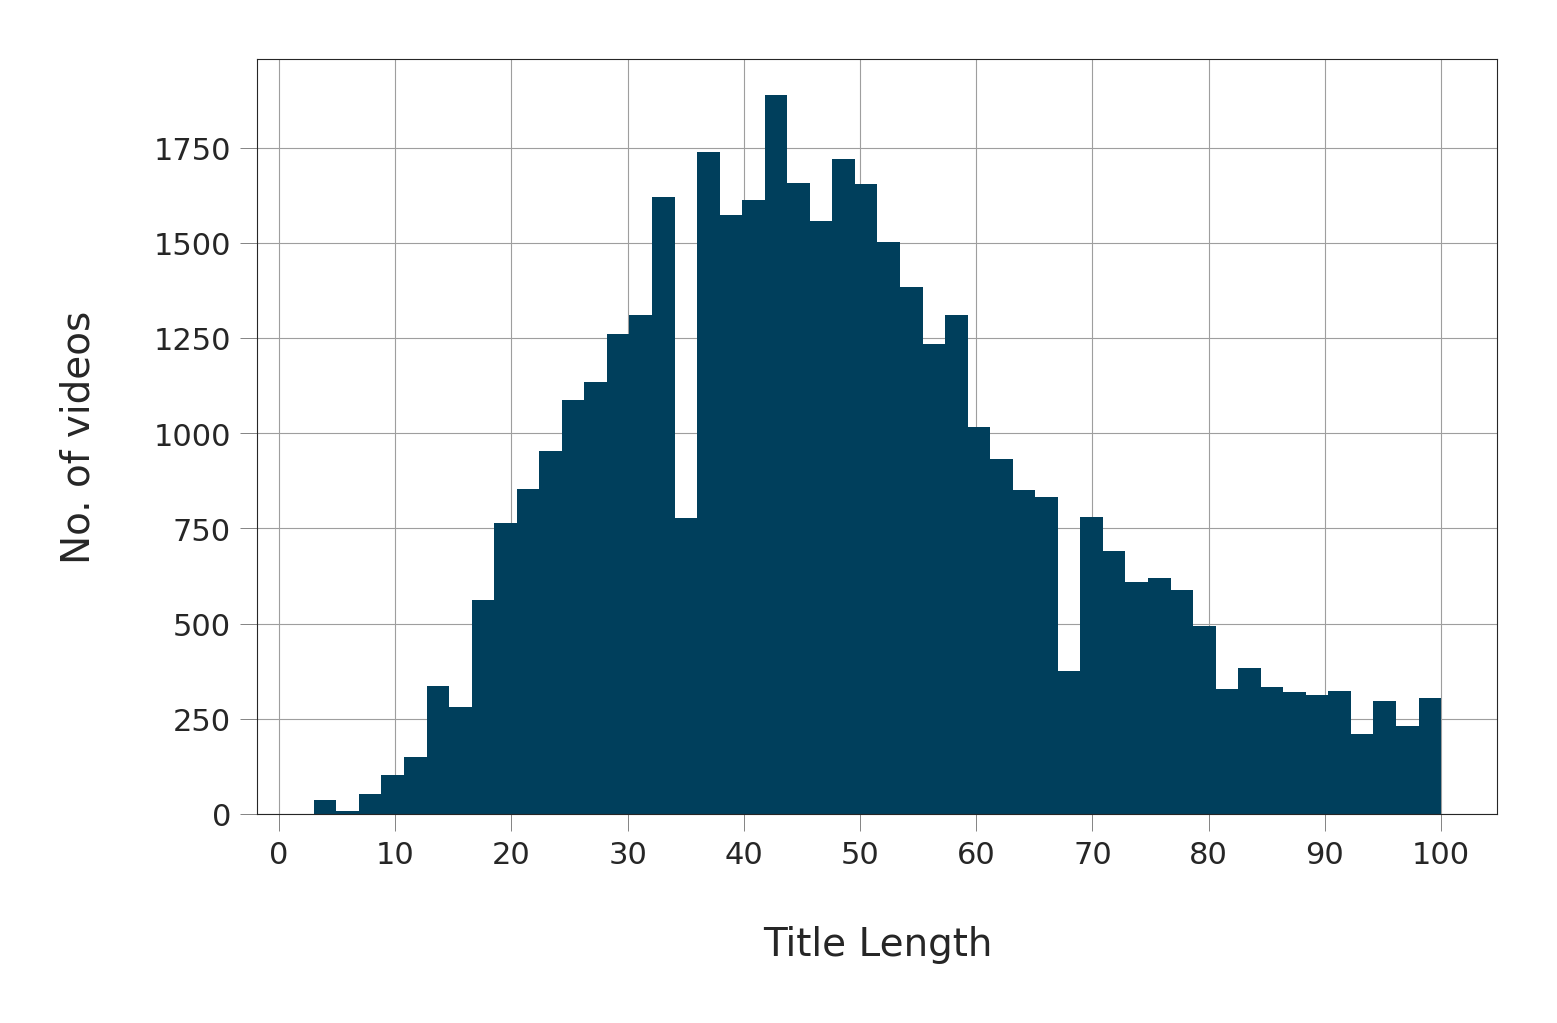

In [ ]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

We can see that title-length distribution resembles a normal distribution, where most videos have title lengths between 30 and 60 character approximately.

Now let's draw a scatter plot between title length and number of views to see the relationship between these two variables

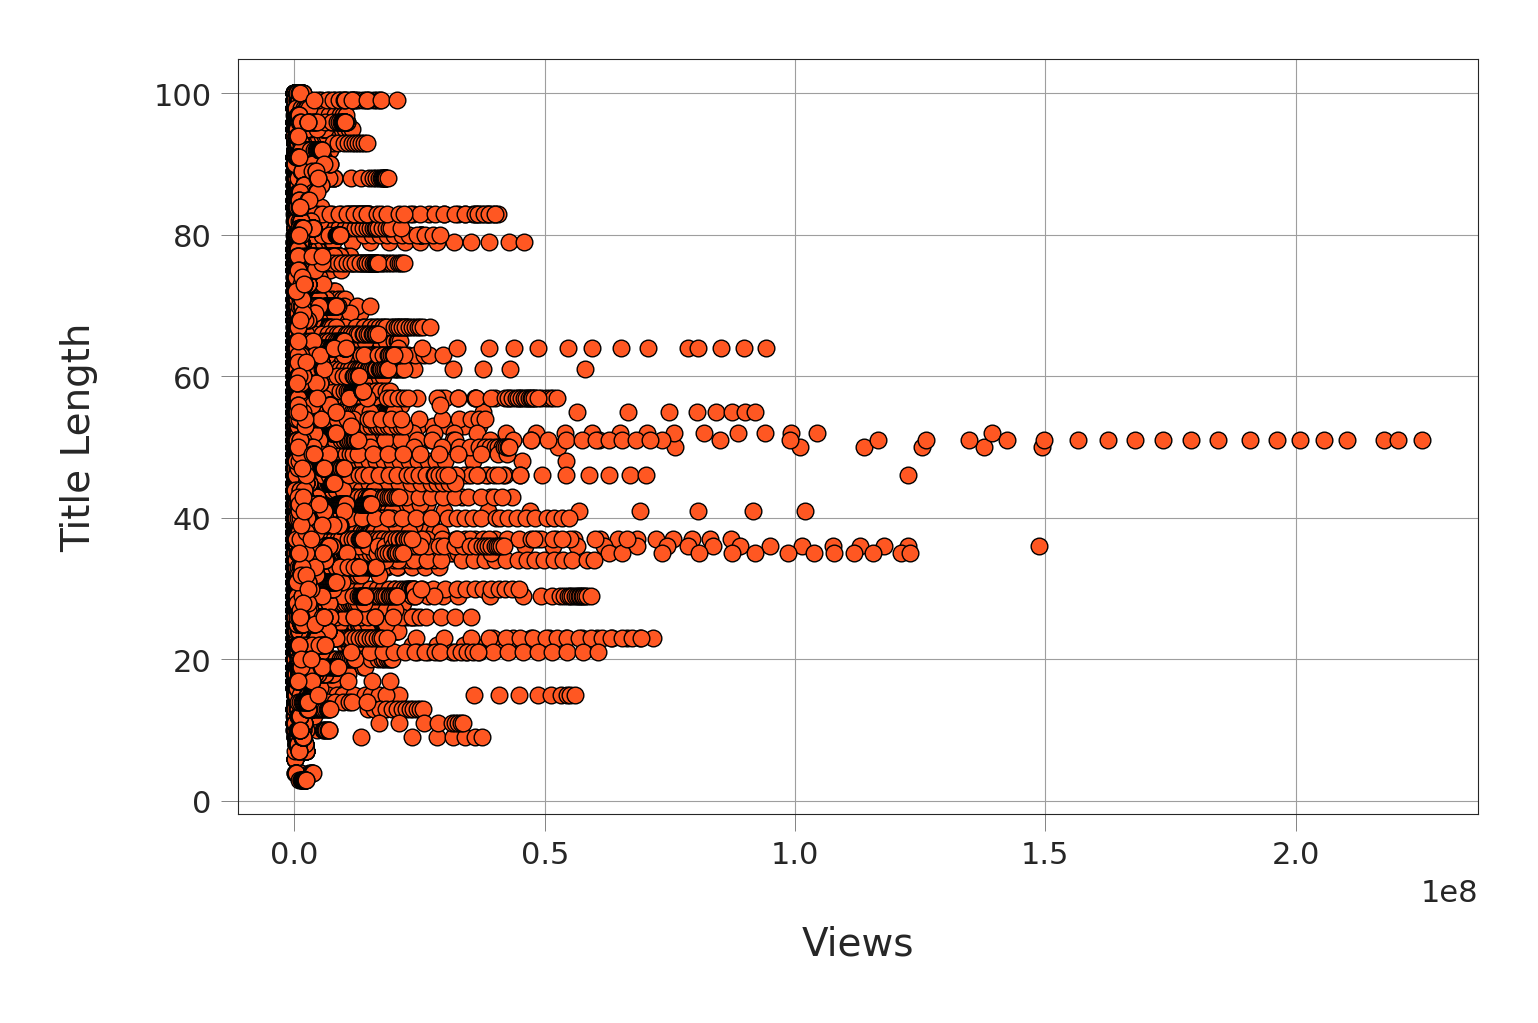

In [ ]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

By looking at the scatter plot, we can say that there is no relationship between the title length and the number of views. However, we notice an interesting thing: videos that have 100,000,000 views and more have title length between 33 and 55 characters approximately.

# **Sentiment Analysis for Trending Video Titles**

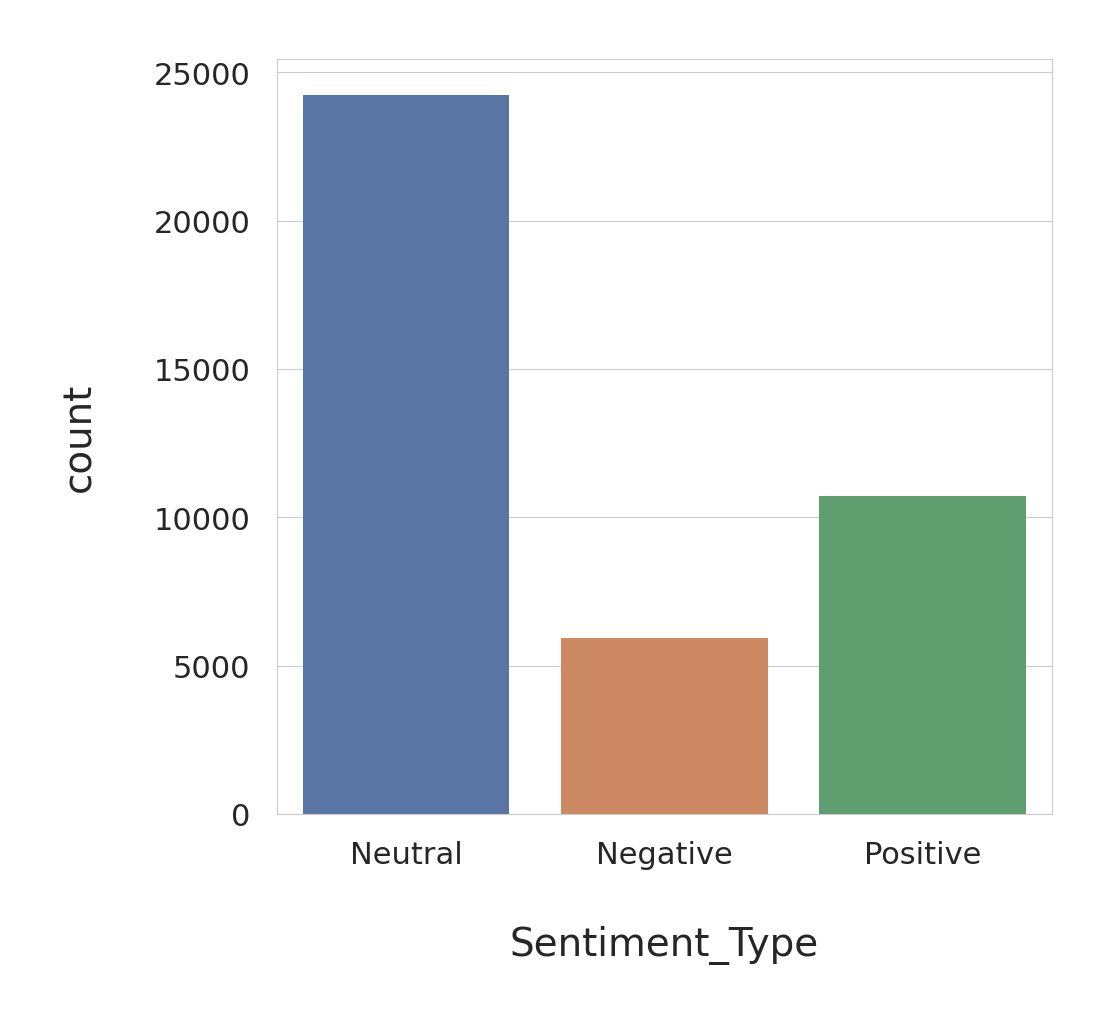

In [ ]:
from textblob import TextBlob

bloblist_title = list()

data_CA_title_str=data_CA['title']
for row in data_CA_title_str:
    blob = TextBlob(row)
    bloblist_title.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    data_CA_polarity_title = pd.DataFrame(bloblist_title, columns = ['sentence','sentiment','polarity'])
 
def f_title(data_CA_polarity_title):
    if data_CA_polarity_title['sentiment'] > 0:
        val = "Positive"
    elif data_CA_polarity_title['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

data_CA_polarity_title['Sentiment_Type'] = data_CA_polarity_title.apply(f_title, axis=1)

plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=data_CA_polarity_title)

In [ ]:
data_CA_polarity_title.nlargest(5, ['sentiment'])

,sentence,sentiment,polarity,Sentiment_Type
4,Ed Sheeran - Perfect (Official Music Video),1.00,1.00,Positive
93,I Tried To Plan The Perfect Wedding,1.00,1.00,Positive
121,Dude Perfect Face Off | Spikeball,1.00,1.00,Positive
153,Best Of r/MildlyVandalised,1.00,0.30,Positive
273,BEST Taiwan STREET FOOD & NIGHT MARKET in Kaoh...,1.00,0.30,Positive


# **Sentiment Analysis for Trending Video Descriptions**

In [ ]:
from textblob import TextBlob

bloblist_desc = list()
data_CA_descr_str = data_CA['description'].astype(str)
for row in data_CA_descr_str:
  blob = TextBlob(row)
  bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
  data_CA_polarity_desc = pd.DataFrame(bloblist_desc, columns=['sentence','sentiment','polarity'])

def por(data_CA_polarity_desc):
  if(data_CA_polarity_desc['sentiment']>0):
    val = "Positive"
  elif data_CA_polarity_desc['sentiment'] ==0:
    val = "Neutral"
  else:
    val = "Negative"
  return val

  data_CA_polarity_desc['Sentiment_Type'] = data_CA_polarity_desc.apply(por,axis=1)

  plt.figure(figsize=(10,10))
  sns.set_style('whitegrid')
  ax = sns.countplot(x='Sentiment_Type', data=data_CA_polarity_desc)

In [ ]:
data_CA_polarity_desc.head()

,sentence,sentiment,polarity
0,Eminem's new track Walk on Water ft. Beyoncé i...,0.51,0.43
1,STill got a lot of packages. Probably will las...,0.20,0.37
2,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.15,0.33
3,I know it's been a while since we did this sho...,0.46,0.34
4,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,0.20,0.20


# **Sentiment Analysis for Trending Video Tags**

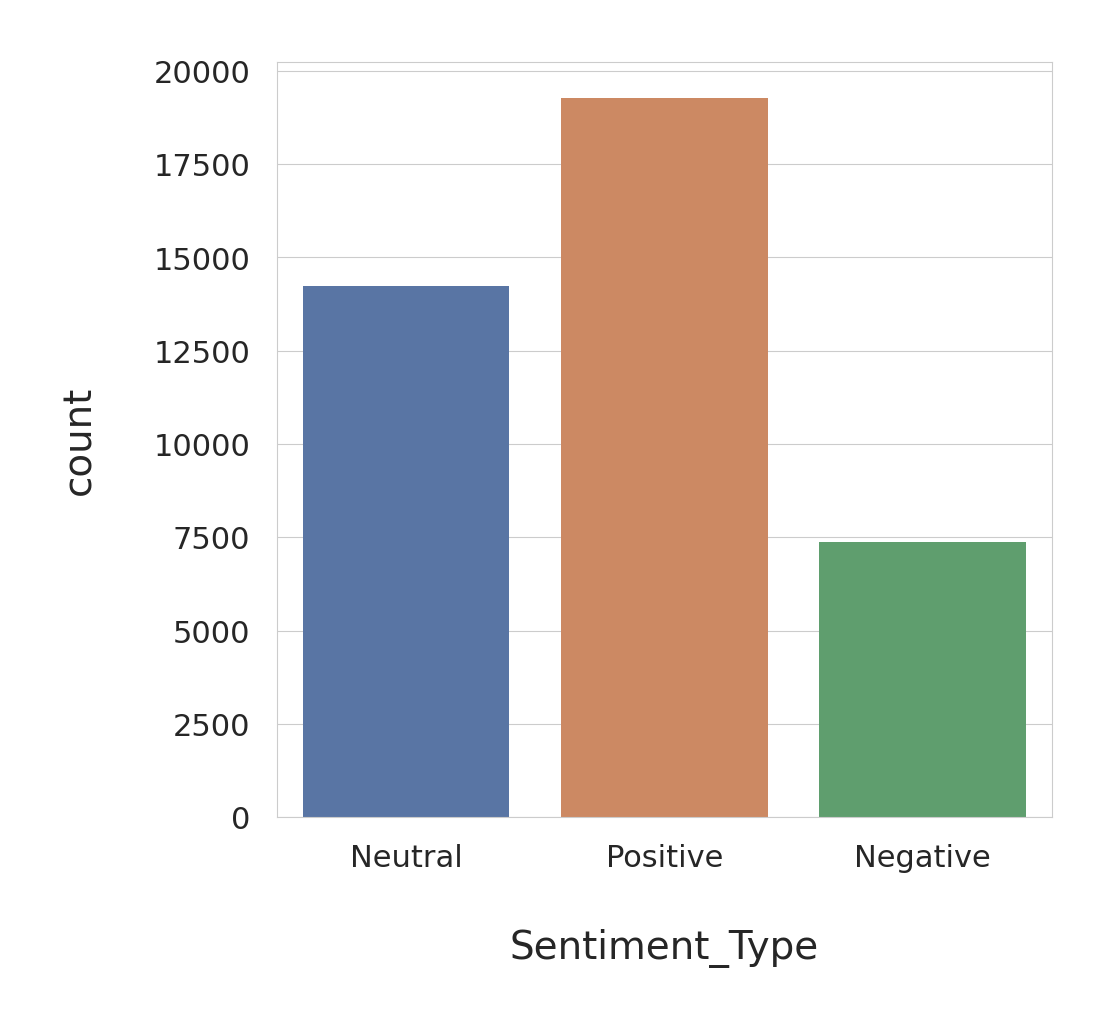

In [ ]:
from textblob import TextBlob

bloblist_tags = list()

data_CA_tags_str=data_CA['tags']
for row in data_CA_tags_str:
    blob = TextBlob(row)
    bloblist_tags.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    data_CA_polarity_tags = pd.DataFrame(bloblist_tags, columns = ['sentence','sentiment','polarity'])
 
def f_tags(data_CA_polarity_tags):
    if data_CA_polarity_tags['sentiment'] > 0:
        val = "Positive"
    elif data_CA_polarity_tags['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

data_CA_polarity_tags['Sentiment_Type'] = data_CA_polarity_tags.apply(f_tags, axis=1)

plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=data_CA_polarity_tags)

# **Correlation between dataset variables**
Now let's see how the dataset variables are correlated with each other: for example, we would like to see how views and likes are correlated, meaning do views and likes increase and decrease together (positive correlation)? Does one of them increase when the other decrease and vice versa (negative correlation)? Or are they not correlated?

Correlation is represented as a value between -1 and +1 where +1 denotes the highest positive correlation, -1 denotes the highest negative correlation, and 0 denotes that there is no correlation.

Let's see the correlation table between our dataset variables (numerical and boolean variables only)

In [ ]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,contains_capitalized,title_length
category_id,1.00,-0.17,-0.17,-0.03,-0.08,0.05,-0.01,-0.03,0.06,0.02
views,-0.17,1.00,0.85,0.47,0.62,0.00,0.02,-0.00,-0.03,-0.04
likes,-0.17,0.85,1.00,0.45,0.80,-0.03,-0.02,-0.00,-0.00,-0.08
dislikes,-0.03,0.47,0.45,1.00,0.70,-0.00,-0.01,-0.00,-0.02,-0.03
comment_count,-0.08,0.62,0.80,0.70,1.00,-0.03,-0.01,-0.00,0.02,-0.07
comments_disabled,0.05,0.00,-0.03,-0.00,-0.03,1.00,0.32,-0.00,0.01,0.03
ratings_disabled,-0.01,0.02,-0.02,-0.01,-0.01,0.32,1.00,-0.00,0.00,0.00
video_error_or_removed,-0.03,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.02,-0.01
contains_capitalized,0.06,-0.03,-0.00,-0.02,0.02,0.01,0.00,-0.02,1.00,0.13
title_length,0.02,-0.04,-0.08,-0.03,-0.07,0.03,0.00,-0.01,0.13,1.00


We see for example that views and likes are highly positively correlated with a correlation value of 0.85; we see also a high positive correlation (0.80) between likes and comment count, and between dislikes and comment count (0.70).

There is some positive correlation between views and dislikes, between views and comment count, between likes and dislikes.

Now let's visualize the correlation table above using a heatmap

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


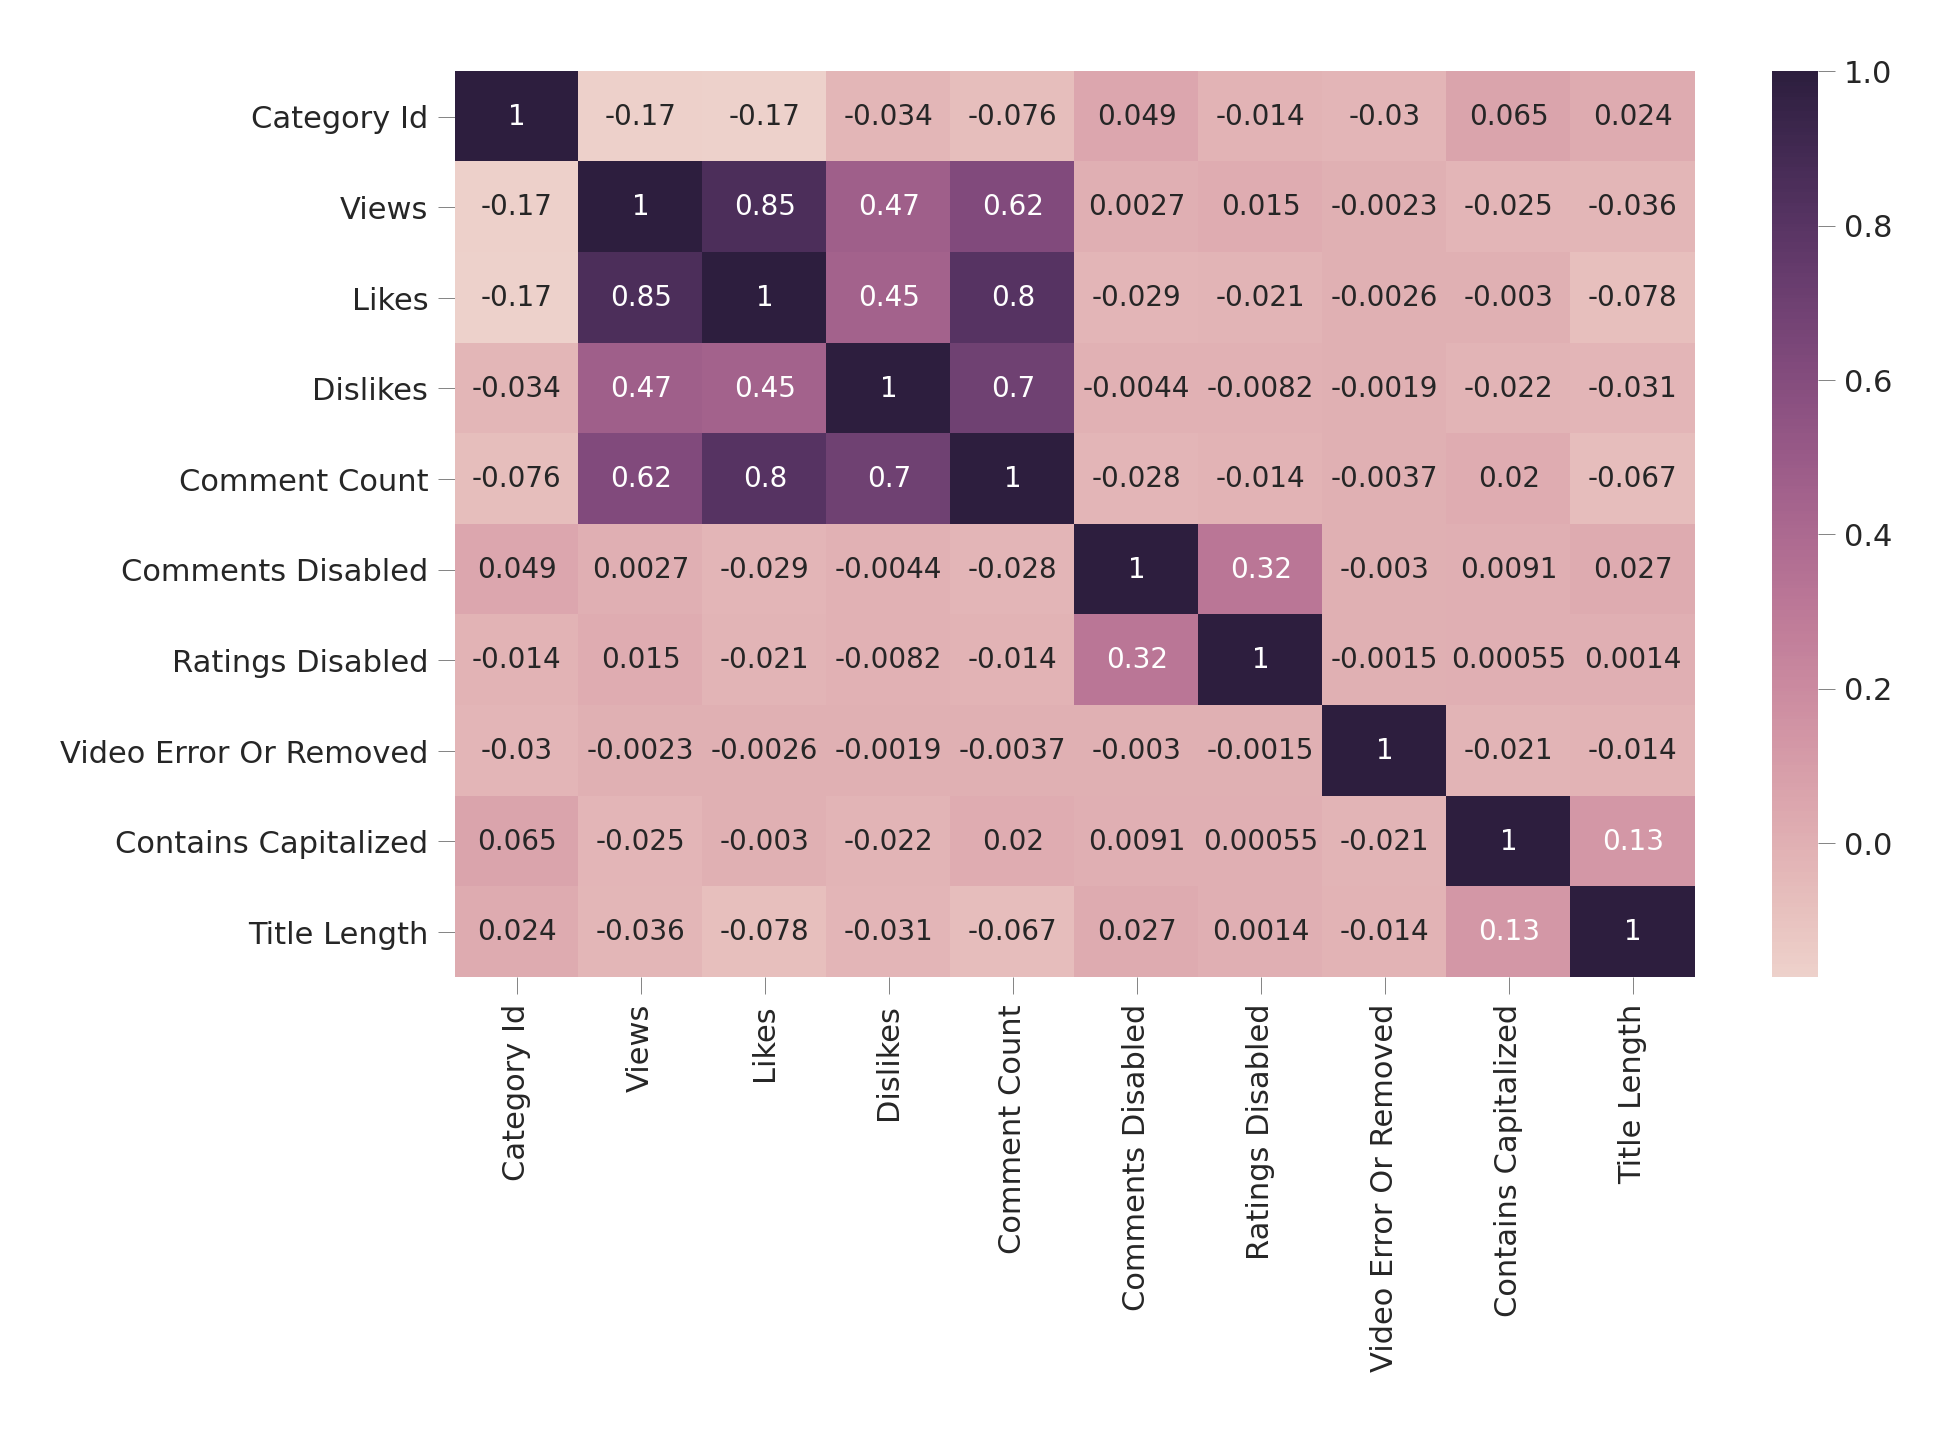

In [ ]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

The correlation map and correlation table above say that views and likes are highly positively correlated. Let's verify that by plotting a scatter plot between views and likes to visualize the relationship between these variables

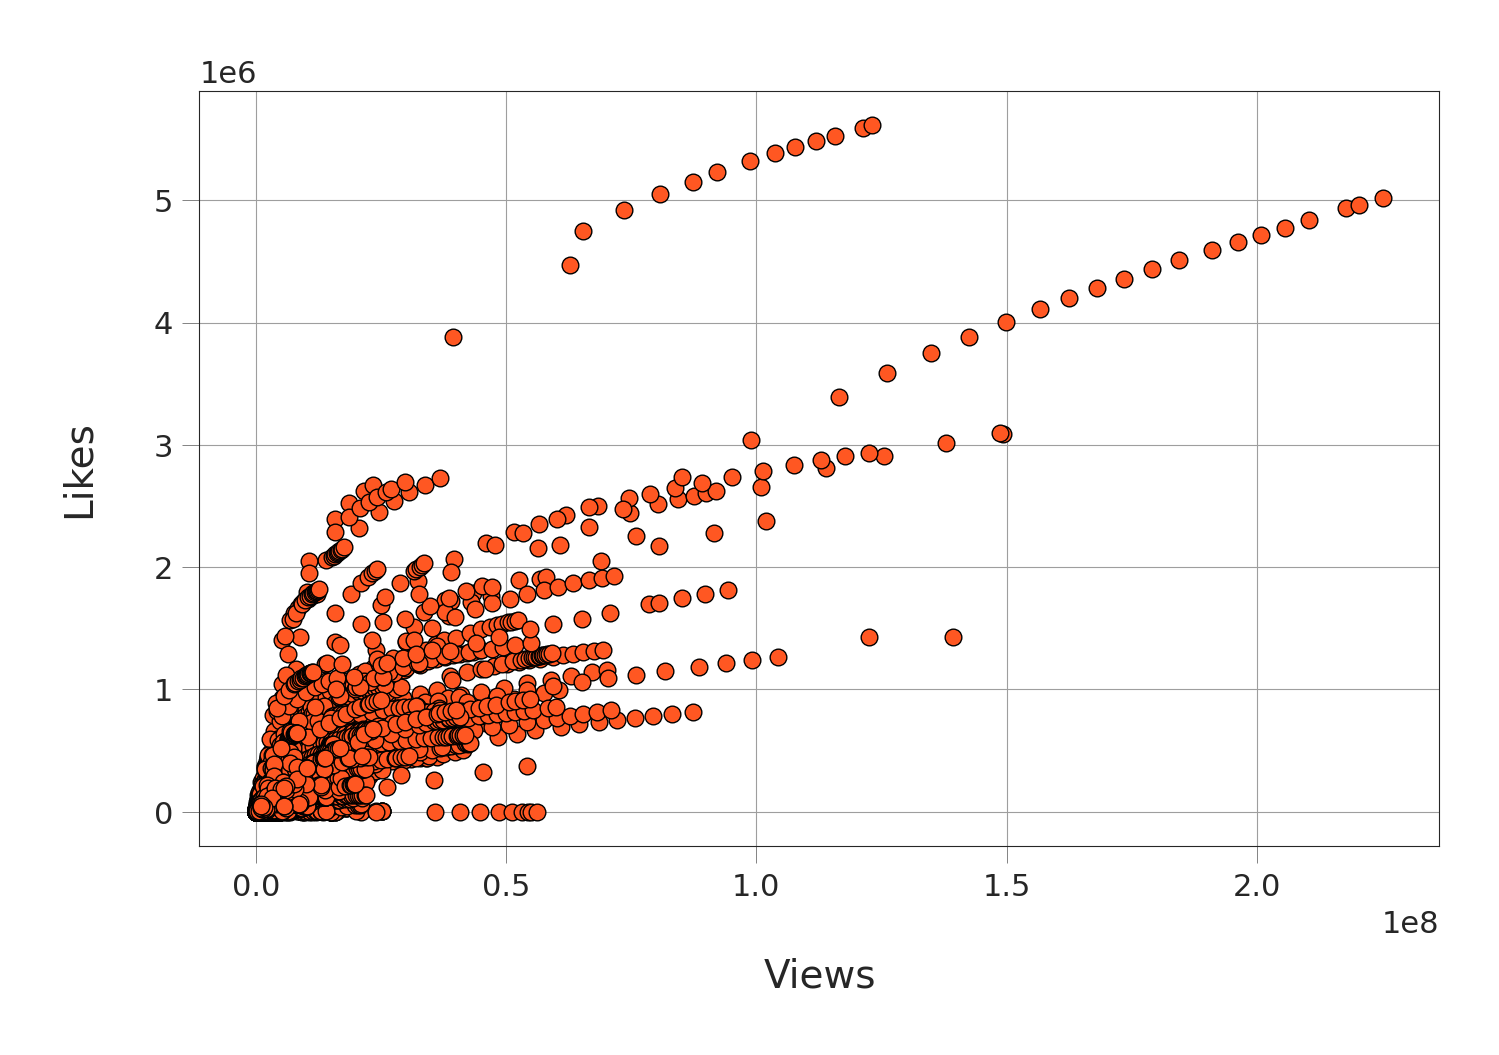

In [ ]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

We see that views and likes are truly positively correlated: as one increases, the other increases too—mostly.

Another verification of the correlation matrix and map is the scatter plot we drew above between views and title length as it shows that there is no correlation between them.

# **Most common words in video titles**
Let's see if there are some words that are used significantly in trending video titles. We will display the 25 most common words in all trending video titles

In [ ]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('-', 11452),
 ('|', 10663),
 ('The', 5762),
 ('the', 3610),
 ('a', 2566),
 ('to', 2343),
 ('of', 2338),
 ('in', 2176),
 ('A', 2122),
 ('&', 2024),
 ('I', 1940),
 ('and', 1917),
 ('Video)', 1901),
 ('Trailer', 1868),
 ('How', 1661),
 ('with', 1655),
 ('2018', 1613),
 ('(Official', 1594),
 ('Official', 1554),
 ('on', 1552),
 ('To', 1397),
 ('You', 1254),
 ('My', 1080),
 ('for', 1020),
 ('ft.', 1017)]

Ignoring words like "the" and "of", we can see that "-" and "|" symbols occured a lot in the 40949 trending video titles: 11452 times and 10663 times respectively. We notice also that words "Video", "Trailer", "How", and "2018" are common in trending video titles; each occured in 1613-1901 video titles.

Let's draw a word cloud for the titles of our trending videos, which is a way to visualize most common words in the titles; the more common the word is, the bigger its font size is

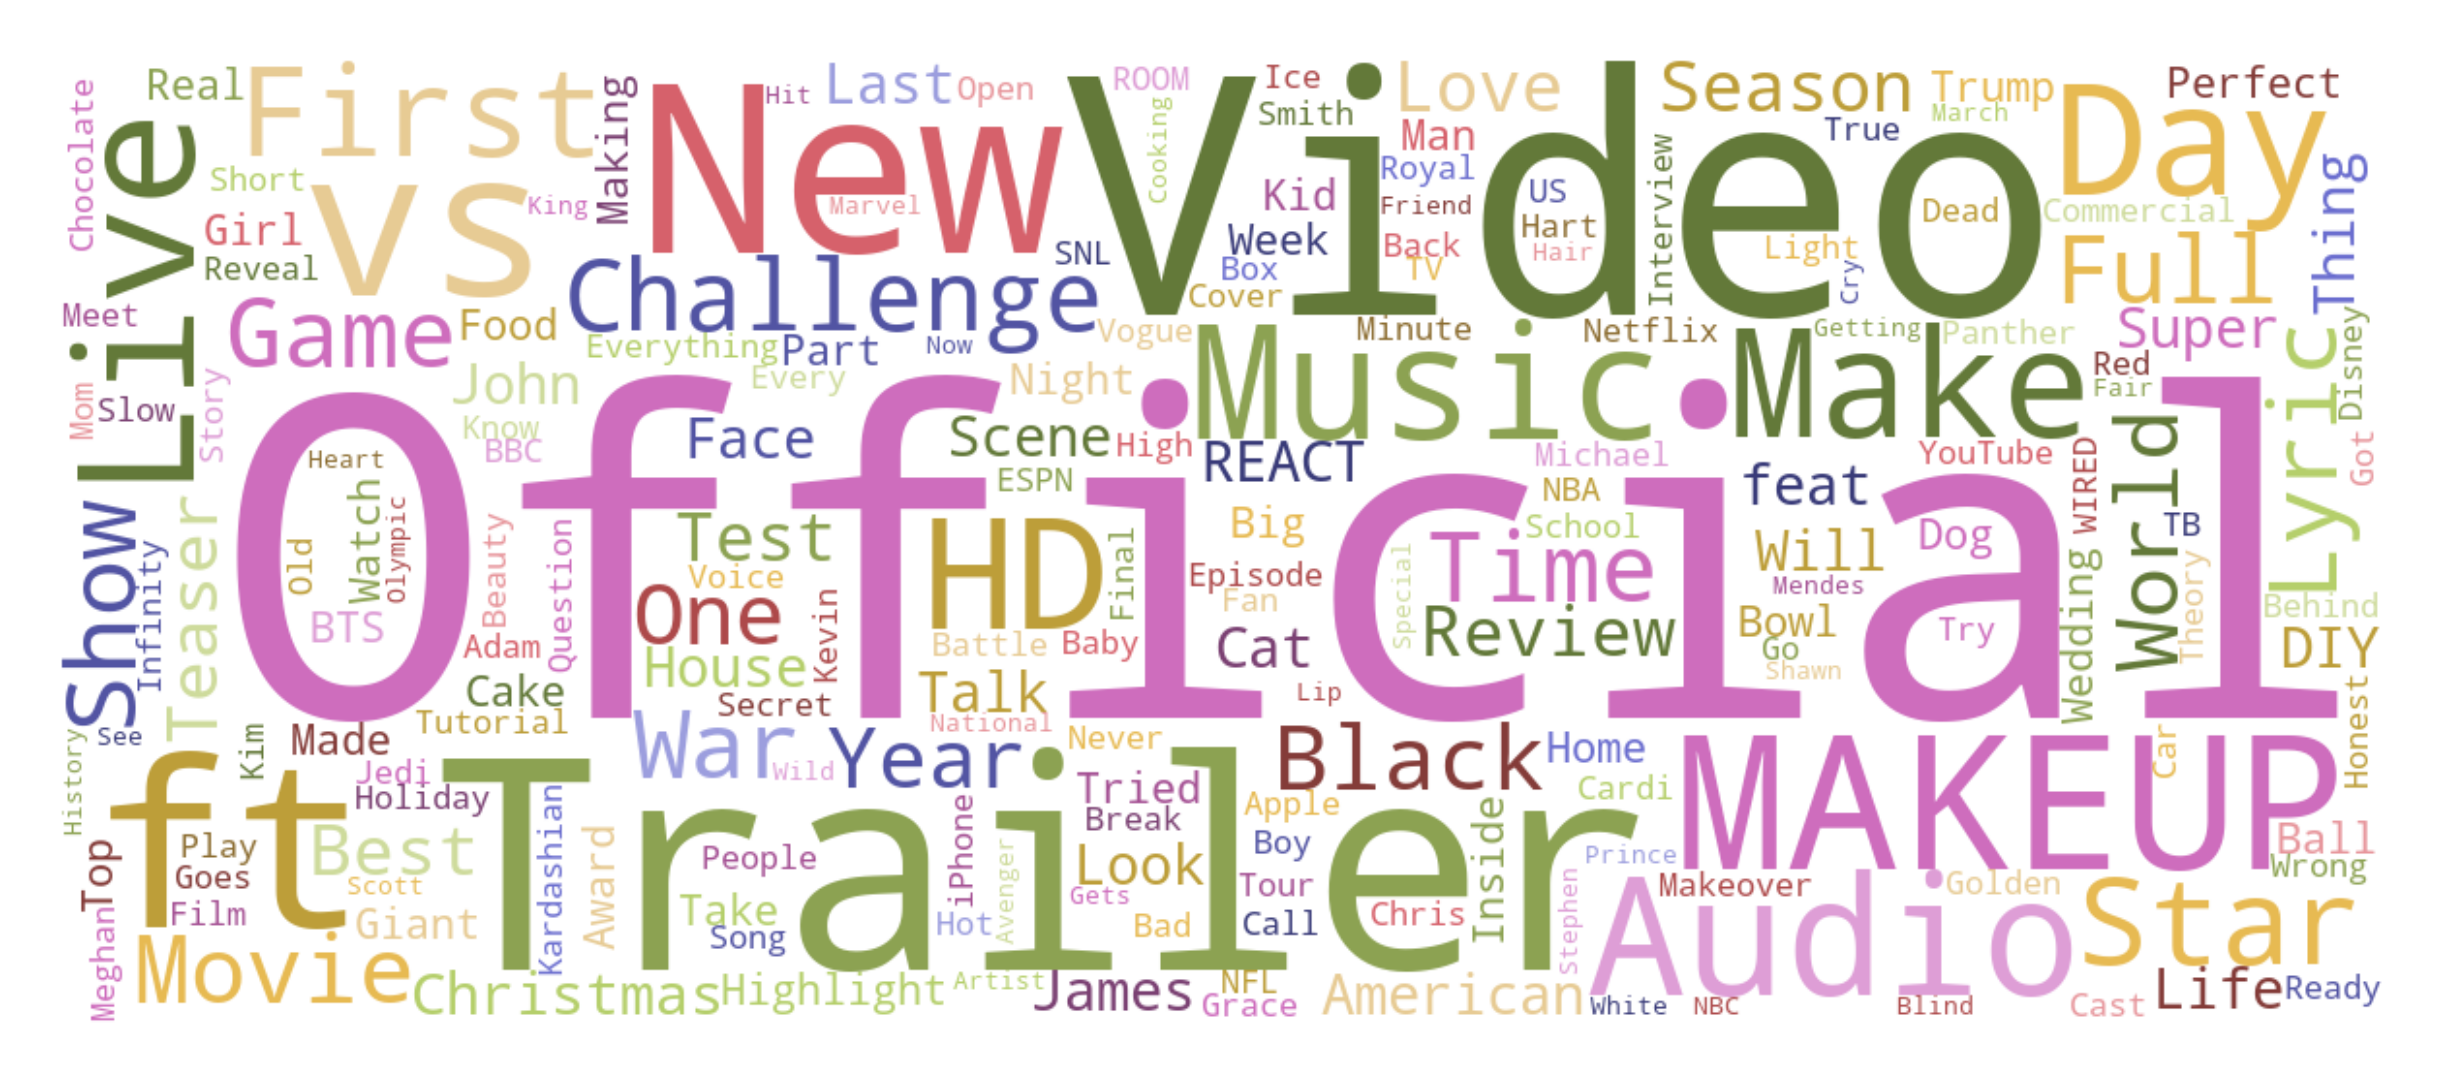

In [ ]:
# wc = wordcloud.WordCloud(width=1200, height=600, collocations=False, stopwords=None, background_color="white", colormap="tab20b").generate_from_frequencies(dict(Counter(title_words).most_common(150)))
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

# **Which channels have the largest number of trending videos?**

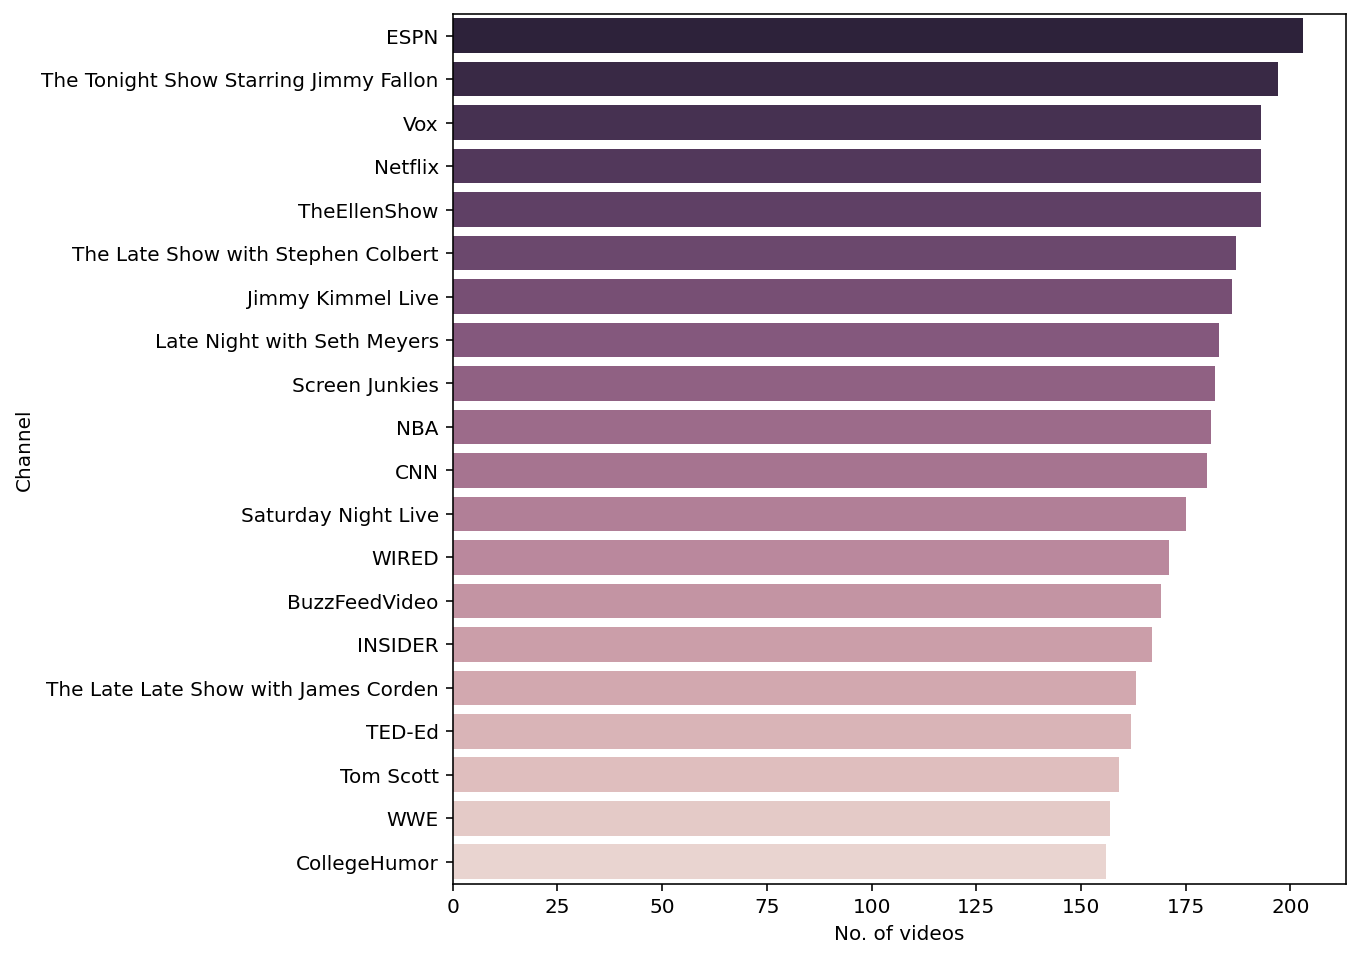

In [ ]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

# **Which video category has the largest number of trending videos?**
First, we will add a column that contains category names based on the values in category_id column. We will use a category JSON file provided with the dataset which contains information about each category.

In [ ]:
with open("/content/drive/MyDrive/SIN Project/US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)

Now we can see which category had the largest number of trending videos

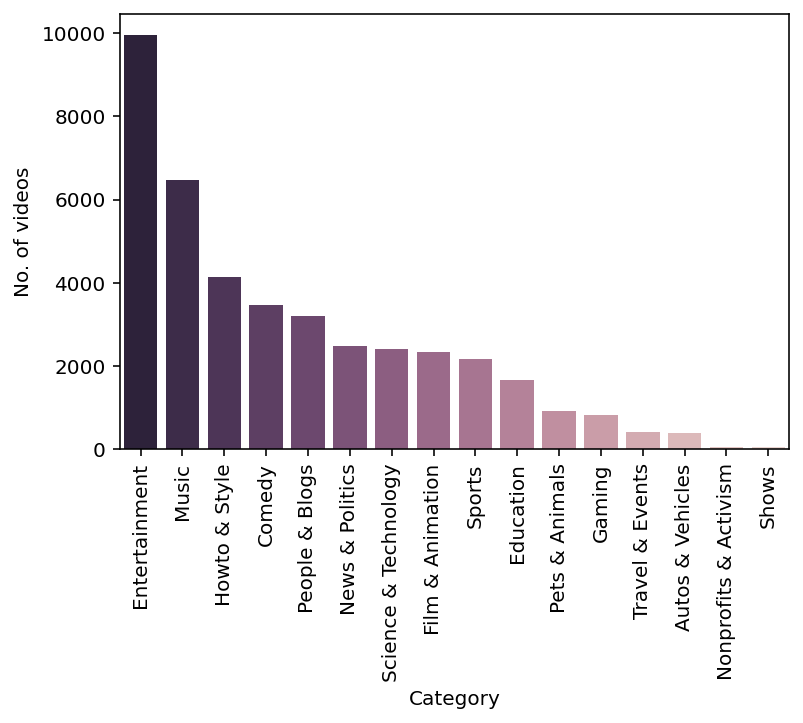

In [ ]:
cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

We see that the Entertainment category contains the largest number of trending videos among other categories: around 10,000 videos, followed by Music category with around 6,200 videos, followed by Howto & Style category with around 4,100 videos, and so on.

# **Trending videos and their publishing time**
An example value of the publish_time column in our dataset is 2017-11-13T17:13:01.000Z. And according to information on this page: https://www.w3.org/TR/NOTE-datetime, this means that the date of publishing the video is 2017-11-13 and the time is 17:13:01 in Coordinated Universal Time (UTC) time zone.

Let's add two columns to represent the date and hour of publishing each video, then delete the original publish_time column because we will not need it anymore

In [ ]:
df["publishing_day"] = df["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])
df.drop(labels='publish_time', axis=1, inplace=True)

Now we can see which days of the week had the largest numbers of trending videos

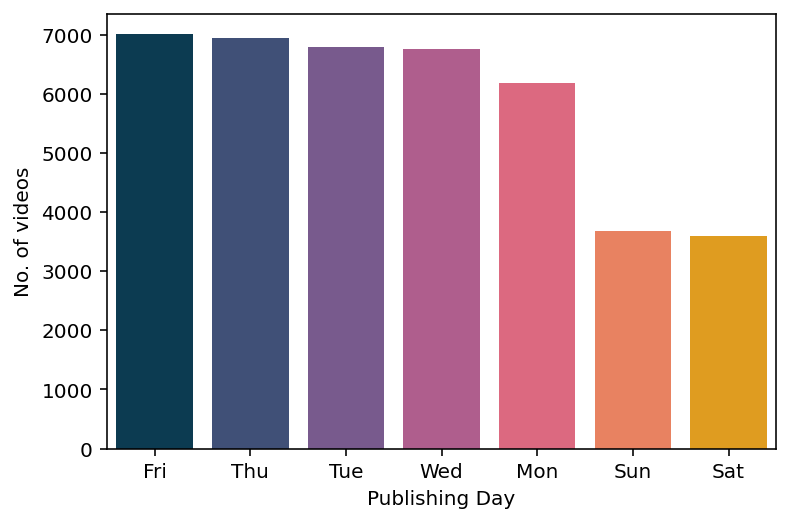

In [ ]:
cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

We can see that the number of trending videos published on Sunday and Saturday are noticeably less than the number of trending videos published on other days of the week.

Now let's use publishing_hour column to see which publishing hours had the largest number of trending videos

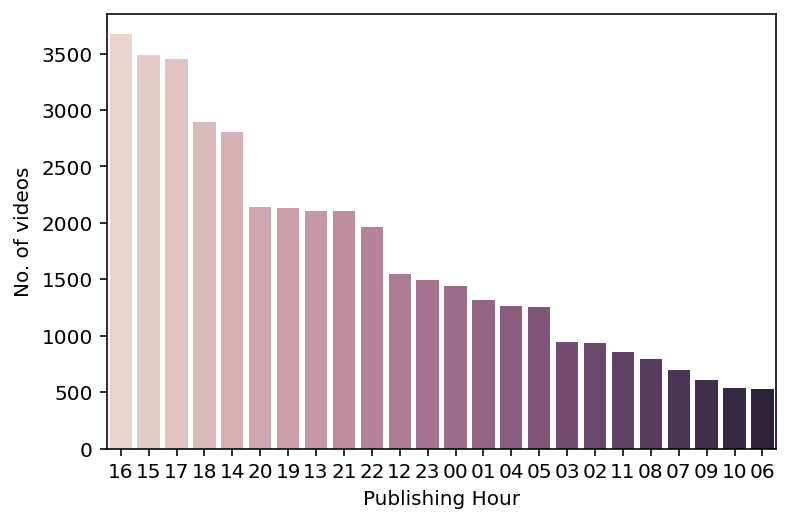

In [ ]:
cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

We can see that the period between 2PM and 7PM, peaking between 4PM and 5PM, had the largest number of trending videos. We notice also that the period between 12AM and 1PM has the smallest number of trending videos. But why is that? Is it because people publish a lot more videos between 2PM and 7PM? Is it because how YouTube algorithm chooses trending videos?

# **How many trending videos have an error?**
To see how many trending videos got removed or had some error, we can use video_error_or_removed column in the dataset

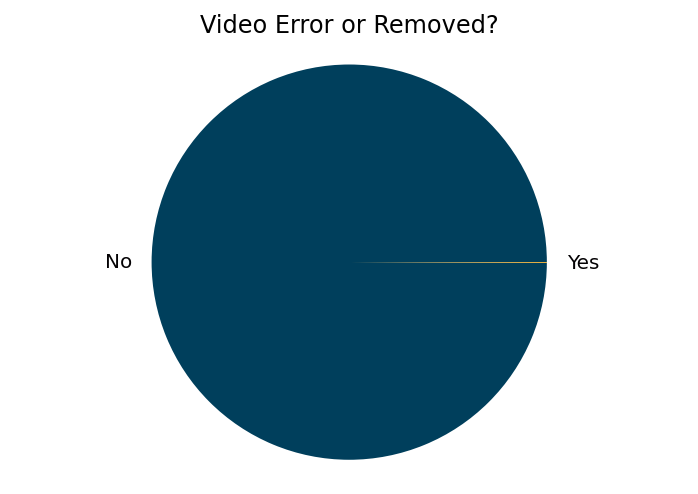

In [ ]:
value_counts = df["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Video Error or Removed?')

In [ ]:
df["video_error_or_removed"].value_counts()

False    40926
True        23
Name: video_error_or_removed, dtype: int64

We can see that out of videos that appeared on trending list (40949 videos), there is a tiny portion (23 videos) with errors.

# **How many trending videos have their comments disabled?**
To know that, we use comments_disabled column

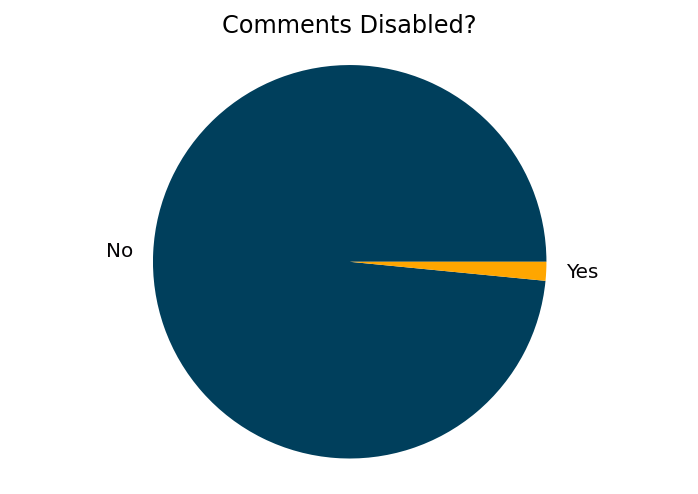

In [ ]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?')

In [ ]:
df["comments_disabled"].value_counts(normalize=True)

False    0.984542
True     0.015458
Name: comments_disabled, dtype: float64

We see that only 2% of trending videos prevented users from commenting.

# **How many trending videos have their ratings disabled?**
To know that, we use ratings_disabled column

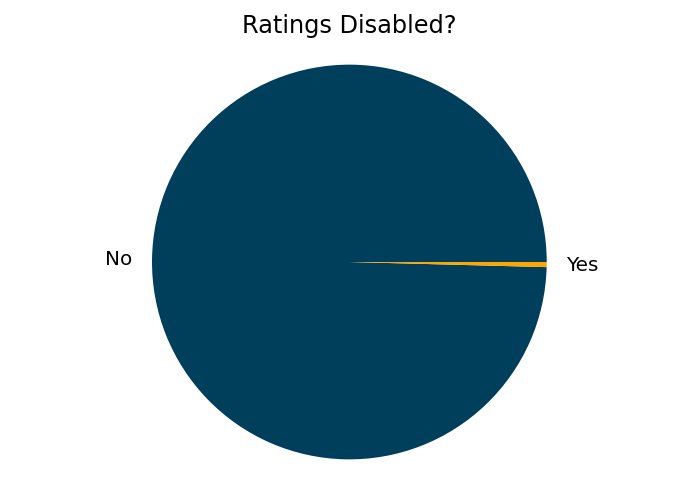

In [ ]:
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
            colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?')

In [ ]:
df["ratings_disabled"].value_counts()

False    40780
True       169
Name: ratings_disabled, dtype: int64

We see that only 169 trending videos out of 40949 prevented users from commenting.

# **How many videos have both comments and ratings disabled?**

In [ ]:
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

106

So there are just 106 trending videos that have both comments and ratings disabled

In [ ]:
from wordcloud import  WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
comments_data = pd.read_csv("/content/drive/MyDrive/SIN Project/GBcomments.csv", error_bad_lines= False)
comments_data.head()

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [ ]:
values = list("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ ")
def remover(my_string = ""):
  for item in my_string:
    if item not in values:
      my_string = my_string.replace(item, "")
  return my_string

In [ ]:
comments_data['comments'] = comments_data['comment_text'].apply(lambda x: remover(str(x)))

In [ ]:
comments_data.head()

,video_id,comment_text,likes,replies,comments
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,Its more accurate to call it the M because th...
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,To be there with a samsung phonen
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,Thank gosh a place I can watch it without havi...
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,What happened to the home button on the iPhone...
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,Power is the disease Care is the cure Keep car...


In [ ]:
comments_data['polarity'] = comments_data['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
comments_data.head()

,video_id,comment_text,likes,replies,comments,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,Its more accurate to call it the M because th...,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,To be there with a samsung phonen,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,Thank gosh a place I can watch it without havi...,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,What happened to the home button on the iPhone...,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,Power is the disease Care is the cure Keep car...,1.00


In [ ]:
comments_data['pol_cat'] = comments_data['polarity']
comments_data['pol_cat'][comments_data.polarity <= 0] = -1
comments_data['pol_cat'][comments_data.polarity > 0] = 1
comments_data.head()

,video_id,comment_text,likes,replies,comments,polarity,pol_cat
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,Its more accurate to call it the M because th...,0.45,1.00
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,To be there with a samsung phonen,0.00,-1.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,Thank gosh a place I can watch it without havi...,0.00,-1.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,What happened to the home button on the iPhone...,0.00,-1.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,Power is the disease Care is the cure Keep car...,1.00,1.00


-1.00    397135
1.00     321317
Name: pol_cat, dtype: int64

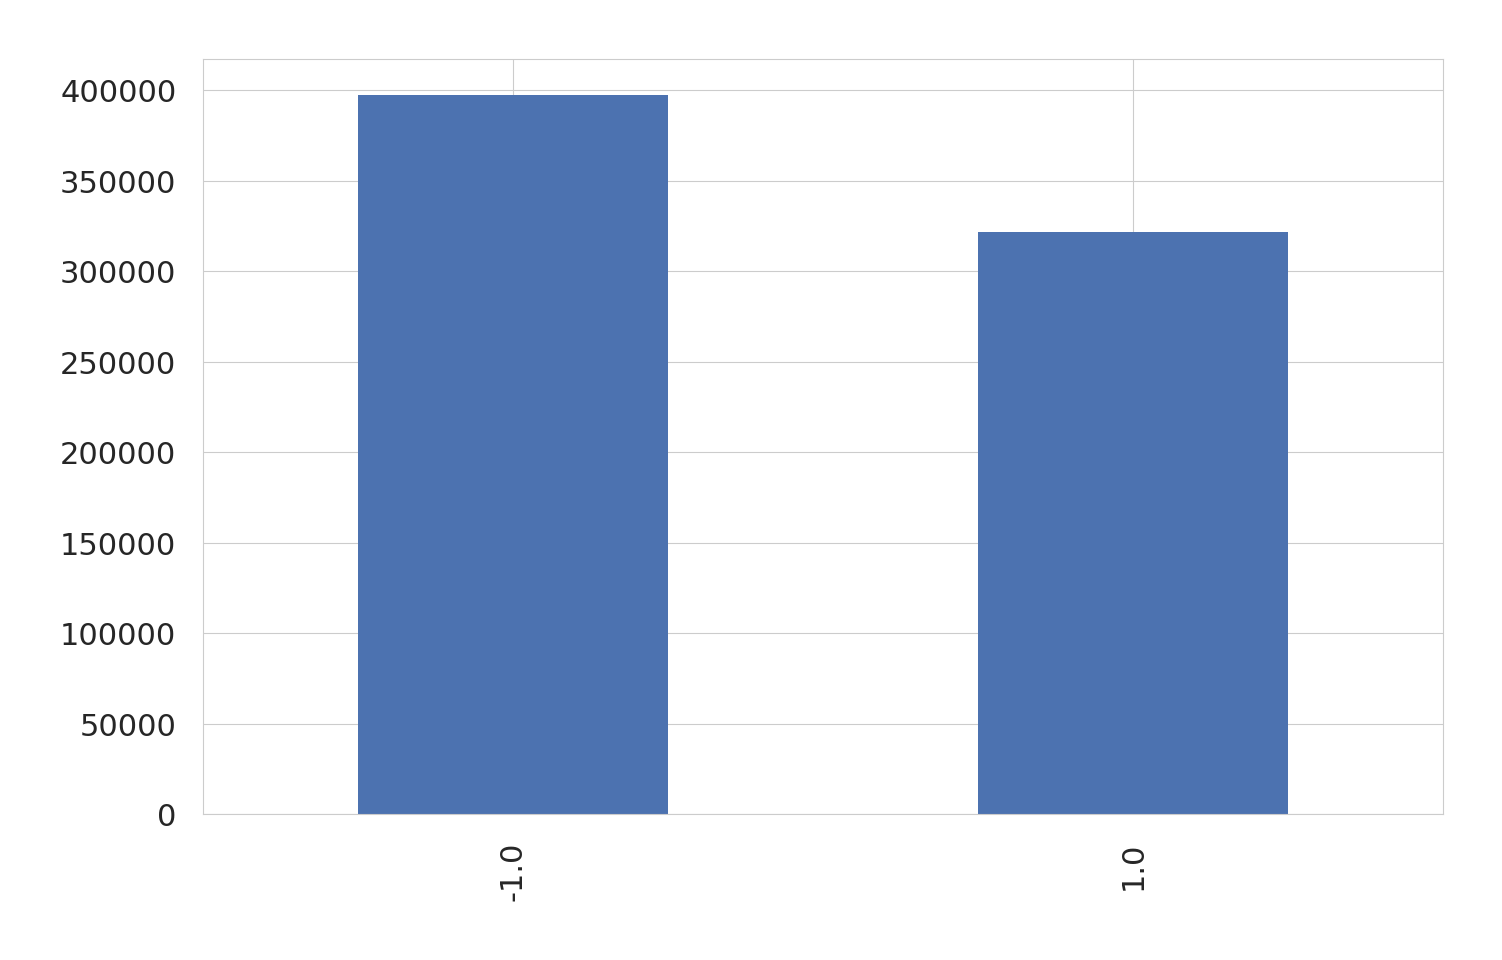

In [ ]:
comments_data.pol_cat.value_counts().plot.bar()
comments_data.pol_cat.value_counts()

In [ ]:
comments_data['comments'] = comments_data['comments'].str.lower()
comments_data['comments'] = comments_data['comments'].str.strip()
comments_data['comments'].head()

0    its more accurate to call it the m  because th...
1                    to be there with a samsung phonen
2    thank gosh a place i can watch it without havi...
3    what happened to the home button on the iphone...
4    power is the disease care is the cure keep car...
Name: comments, dtype: object

In [ ]:
comments_data.dropna()
comments_data.isnull().sum()

video_id         0
comment_text    28
likes            0
replies          0
comments         0
polarity         0
pol_cat          0
dtype: int64

In [ ]:

stop_words = set(stopwords.words('english'))
def remove_stopwords(line):
  words_tokens = word_tokenize(line)
  filtered_sentence = [w for w in words_tokens if not w in stop_words]
  return " ".join(filtered_sentence)

In [ ]:
comments_data['stop_comments'] = comments_data['comments'].apply(lambda x: remove_stopwords(x))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(comments_data['stop_comments'], comments_data['pol_cat'], test_size = 0.20, random_state = 5)

In [ ]:
# X_train = X_train[1:2000]
# Y_train = Y_train[1:]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.fit_transform(X_test)

In [ ]:
tf_train.shape

(574761, 156176)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(tf_train, Y_train)
print("Logistic Regression for training data", logistic_model.score(tf_train, Y_train))
#print("Logistic Regression for testing data", logistic_model.score(tf_test, Y_test))

decision_tree = DecisionTreeClassifier(max_depth=10)
decision_tree.fit(tf_train, Y_train)
print("Decision Tree for training data", decision_tree.score(tf_train, Y_train))
#print("Decision Tree for testing data", decision_tree.score(tf_test, Y_test))

# estimators = [1,3,5,7,9,11]
# for i in estimators:
Random_forest = RandomForestClassifier(n_estimators=5)
Random_forest.fit(tf_train, Y_train)
print("Random Forest for training data", Random_forest.score(tf_train, Y_train))
#print("Random Forest for testing data", Random_forest.score(tf_test, Y_test))

Logistic Regression for training data 0.9766355058885345
Decision Tree for training data 0.7714336915691914
Random Forest for training data 0.9954450632523779


In [ ]:
Random_forest_test = RandomForestClassifier(n_estimators=5)
Random_forest_test.fit(tf_test[1:10000], Y_test[1:10000])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
Y_pred = Random_forest_test.predict(tf_test[10000:])
actual = Y_test[10000:]

[[65906  7669]
 [ 9803 50313]]


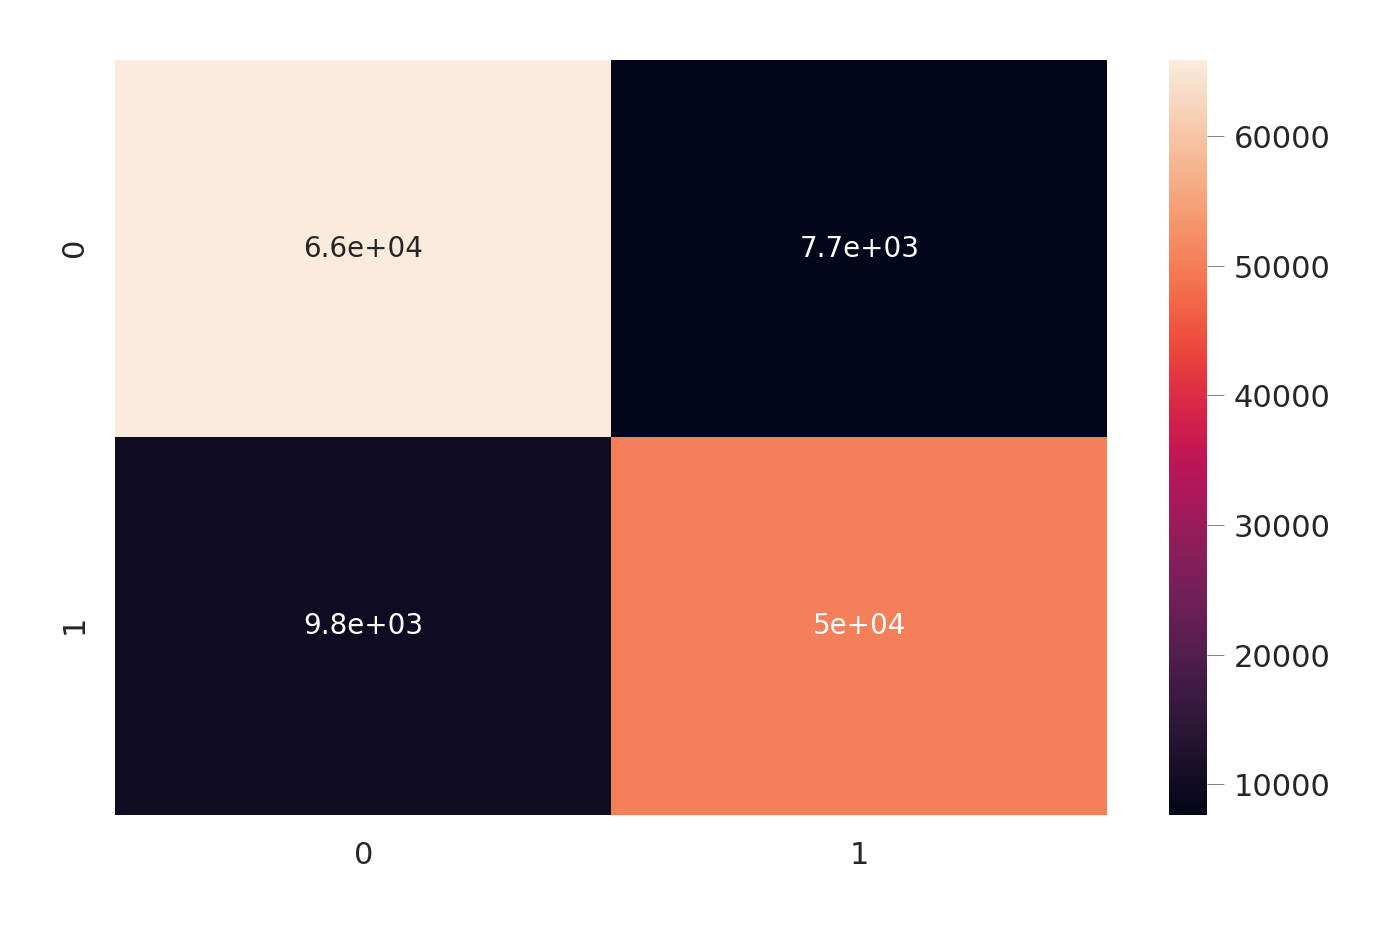

In [ ]:
from sklearn.metrics import plot_confusion_matrix
cf = confusion_matrix(actual, Y_pred, labels = [-1,1])
print(cf)
sns.heatmap(cf, annot=True)
plt.show()

In [ ]:
print(classification_report(actual, Y_pred))

              precision    recall  f1-score   support

        -1.0       0.87      0.90      0.88     73575
         1.0       0.87      0.84      0.85     60116

    accuracy                           0.87    133691
   macro avg       0.87      0.87      0.87    133691
weighted avg       0.87      0.87      0.87    133691



In [ ]:
from sklearn.metrics import f1_score
print(f1_score(actual, Y_pred))

0.852055072905553


In [ ]:
logistic_model_test = LogisticRegression()
logistic_model_test.fit(tf_test[1:10000], Y_test[1:10000])
Y_logistic_pred = logistic_model_test.predict(tf_test[10000:])
logistic_acc = accuracy_score(actual, Y_logistic_pred)
print(logistic_acc)

0.9094703457973985


In [ ]:
print(f1_score(actual, Y_logistic_pred))

0.893923591330184


In [ ]:
decision_tree_test = DecisionTreeClassifier(max_depth=10)
decision_tree_test.fit(tf_test[1:10000], Y_test[1:10000])
Y_decision_pred = decision_tree_test.predict(tf_test[10000:])
decision_tree_acc = accuracy_score(actual, Y_decision_pred)
#actual = Y_test[10000:]
print(decision_tree_acc)

0.7629683374348311
